In [ ]:
#설치후 세션 다시시작
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,972 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr

In [ ]:
import random
import numpy as np
import os
import torch

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(42)

In [ ]:
import pandas as pd
import numpy as np
import os
from collections import defaultdict

# -----------------------------
# 1. 파일 경로 설정
# -----------------------------
train_path = "train.csv"
test_paths = [f"TEST_0{i}.csv" for i in range(10)]
sample_submission_path = "sample_submission.csv"

# -----------------------------
# 2. 데이터 로딩
# -----------------------------
train_df = pd.read_csv(train_path)
test_dfs = [pd.read_csv(path) for path in test_paths]
sample_submission = pd.read_csv(sample_submission_path)

In [ ]:
# -----------------------------
# 3. 업장별 메뉴명 딕셔너리 구성
# -----------------------------
menu_names = train_df['영업장명_메뉴명'].unique()
업장_메뉴맵 = defaultdict(list)

for menu in menu_names:
    if '_' in menu:
        업장명 = menu.split('_')[0]
    else:
        업장명 = menu
    업장_메뉴맵[업장명].append(menu)

menu_names,train_df['영업장명_메뉴명'].nunique()

(array(['느티나무 셀프BBQ_1인 수저세트', '느티나무 셀프BBQ_BBQ55(단체)',
        '느티나무 셀프BBQ_대여료 30,000원', '느티나무 셀프BBQ_대여료 60,000원',
        '느티나무 셀프BBQ_대여료 90,000원', '느티나무 셀프BBQ_본삼겹 (단품,실내)',
        '느티나무 셀프BBQ_스프라이트 (단체)', '느티나무 셀프BBQ_신라면', '느티나무 셀프BBQ_쌈야채세트',
        '느티나무 셀프BBQ_쌈장', '느티나무 셀프BBQ_육개장 사발면', '느티나무 셀프BBQ_일회용 소주컵',
        '느티나무 셀프BBQ_일회용 종이컵', '느티나무 셀프BBQ_잔디그늘집 대여료 (12인석)',
        '느티나무 셀프BBQ_잔디그늘집 대여료 (6인석)', '느티나무 셀프BBQ_잔디그늘집 의자 추가',
        '느티나무 셀프BBQ_참이슬 (단체)', '느티나무 셀프BBQ_친환경 접시 14cm',
        '느티나무 셀프BBQ_친환경 접시 23cm', '느티나무 셀프BBQ_카스 병(단체)',
        '느티나무 셀프BBQ_콜라 (단체)', '느티나무 셀프BBQ_햇반', '느티나무 셀프BBQ_허브솔트',
        '담하_(단체) 공깃밥', '담하_(단체) 생목살 김치전골 2.0', '담하_(단체) 은이버섯 갈비탕',
        '담하_(단체) 한우 우거지 국밥', '담하_(단체) 황태해장국 3/27까지', '담하_(정식) 된장찌개',
        '담하_(정식) 물냉면 ', '담하_(정식) 비빔냉면', '담하_(후식) 된장찌개', '담하_(후식) 물냉면',
        '담하_(후식) 비빔냉면', '담하_갑오징어 비빔밥', '담하_갱시기', '담하_공깃밥', '담하_꼬막 비빔밥',
        '담하_느린마을 막걸리', '담하_담하 한우 불고기', '담하_담하 한우 불고기 정식', '담하_더덕 한우 지짐',
        '담하_들깨 양지탕', '담하_라면사리

In [ ]:
# -----------------------------
# 4. 업장 수 및 예시 출력
# -----------------------------
print(f"총 업장 수: {len(업장_메뉴맵)}개")
for 업장명, 메뉴리스트 in list(업장_메뉴맵.items())[:3]:
    print(f"[{업장명}] 메뉴 수: {len(메뉴리스트)} → 예시: {메뉴리스트[:3]}")


총 업장 수: 9개
[느티나무 셀프BBQ] 메뉴 수: 23 → 예시: ['느티나무 셀프BBQ_1인 수저세트', '느티나무 셀프BBQ_BBQ55(단체)', '느티나무 셀프BBQ_대여료 30,000원']
[담하] 메뉴 수: 42 → 예시: ['담하_(단체) 공깃밥', '담하_(단체) 생목살 김치전골 2.0', '담하_(단체) 은이버섯 갈비탕']
[라그로타] 메뉴 수: 25 → 예시: ['라그로타_AUS (200g)', '라그로타_G-Charge(3)', '라그로타_Gls.Sileni']


날짜 범위: 2023-01-01 00:00:00  ~  2024-06-15 00:00:00
총 고유 업장 수: 9
총 고유 메뉴 수: 193


/tmp/ipython-input-2872844708.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  plt.tight_layout()


KeyboardInterrupt: 

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


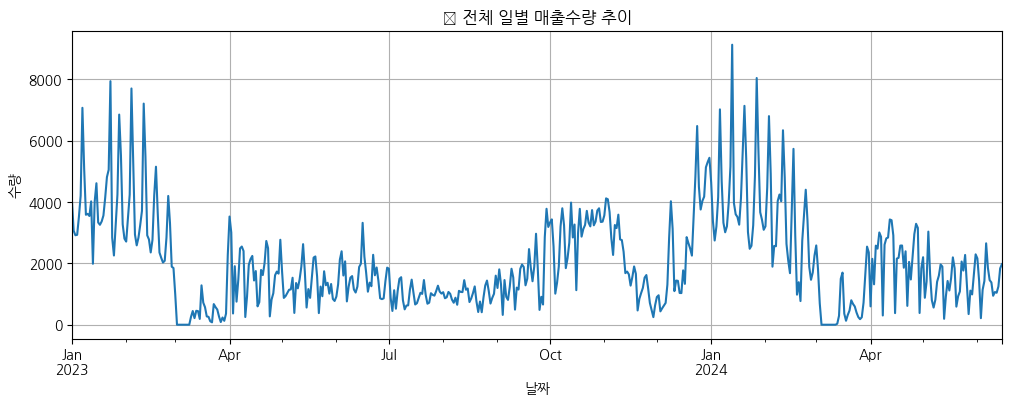

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기 (이미 되어있다면 생략)
train_df['영업일자'] = pd.to_datetime(train_df['영업일자'])

# ① 날짜 범위 확인
print("날짜 범위:", train_df['영업일자'].min(), " ~ ", train_df['영업일자'].max())

# ② 총 업장/메뉴 수
print("총 고유 업장 수:", len(set([x.split('_')[0] for x in train_df['영업장명_메뉴명'].unique()])))
print("총 고유 메뉴 수:", train_df['영업장명_메뉴명'].nunique())

# ③ 일별 전체 매출수량 추이
daily_sales = train_df.groupby('영업일자')['매출수량'].sum()

# 한글 폰트 설정 (NanumGothic 사용)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False


plt.figure(figsize=(12, 4))
daily_sales.plot()
plt.title("📊 전체 일별 매출수량 추이")
plt.xlabel("날짜")
plt.ylabel("수량")
plt.grid(True)
plt.tight_layout()
plt.show()

# ④ 업장별 총 매출수량 분포
train_df['업장명'] = train_df['영업장명_메뉴명'].apply(lambda x: x.split('_')[0])
store_sales = train_df.groupby('업장명')['매출수량'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x=store_sales.index, y=store_sales.values)
plt.title("🏢 업장별 총 매출수량")
plt.xticks(rotation=45)
plt.ylabel("총 수량")
plt.tight_layout()
plt.show()

# ⑤ 메뉴별 매출수량 상위/하위 10
top_menus = train_df.groupby('영업장명_메뉴명')['매출수량'].sum().sort_values(ascending=False).head(10)
bottom_menus = train_df.groupby('영업장명_메뉴명')['매출수량'].sum().sort_values(ascending=True).head(10)

print("\n📈 수요량 상위 10개 메뉴:")
print(top_menus)

print("\n📉 수요량 하위 10개 메뉴:")
print(bottom_menus)


In [ ]:
# ✅ 메뉴별 수요(매출수량)이 0이 아닌 일 수 계산

# 1. 일자-메뉴 시계열 테이블 생성
pivot_df = train_df.pivot_table(index='영업일자', columns='영업장명_메뉴명', values='매출수량', fill_value=0)

# 2. 메뉴별로 0이 아닌 일 수 계산
nonzero_days_per_menu = (pivot_df > 0).sum()

# 3. 히스토그램 시각화 (몇 일 이상 팔렸는지)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
nonzero_days_per_menu.hist(bins=30)
plt.title("📊 메뉴별 유효 판매일 수 (매출수량 > 0)")
plt.xlabel("유효 일 수")
plt.ylabel("메뉴 수")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. 유효 판매일 수 기준 하위/상위 메뉴 확인
least_sold = nonzero_days_per_menu.sort_values().head(10)
most_sold = nonzero_days_per_menu.sort_values(ascending=False).head(10)

least_sold, most_sold

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 요일 정보 추가
train_df['영업일자'] = pd.to_datetime(train_df['영업일자'])
train_df['요일'] = train_df['영업일자'].dt.dayofweek  # 0=월 ~ 6=일
요일명 = ['월', '화', '수', '목', '금', '토', '일']
train_df['요일명'] = train_df['요일'].apply(lambda x: 요일명[x])

# 2. 전체 요일별 수요 집계
weekday_total = train_df.groupby('요일명')['매출수량'].sum().reindex(요일명)

# 3. 업장별 요일별 수요 집계 (피벗)
train_df['업장명'] = train_df['영업장명_메뉴명'].apply(lambda x: x.split('_')[0])
weekday_store = train_df.groupby(['업장명', '요일명'])['매출수량'].sum().reset_index()
weekday_store_pivot = weekday_store.pivot(index='요일명', columns='업장명', values='매출수량').reindex(요일명)

# 4. 시각화
plt.figure(figsize=(10, 4))
sns.barplot(x=weekday_total.index, y=weekday_total.values)
plt.title("전체 요일별 수요 총합")
plt.xlabel("요일")
plt.ylabel("매출수량")
plt.grid(True)
plt.tight_layout()
plt.show()

weekday_store_pivot.plot(kind='line', marker='o', figsize=(10, 5))
plt.title("업장별 요일별 수요 추이")
plt.xlabel("요일")
plt.ylabel("매출수량")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# ✅ 결측값 확인

# 1. train_df 전체 결측값 수
null_counts = train_df.isnull().sum()

# 2. 결측값이 있는 컬럼만 추출
null_columns = null_counts[null_counts > 0]

# 3. 전체 행 수 대비 결측 비율도 함께 출력
total_rows = len(train_df)
null_ratio = (null_columns / total_rows * 100).round(2)

null_report = pd.DataFrame({
    '결측값 수': null_columns,
    '결측률 (%)': null_ratio
})

null_report

In [ ]:
window_size = 30
forecast_horizon = 7

In [ ]:
# 1. 피벗 테이블 (날짜 x 메뉴)
pivot_df = train_df.pivot(index='영업일자', columns='영업장명_메뉴명', values='매출수량').fillna(0)

# 2. 정규화 (MinMaxScaler 적용)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(pivot_df)
scaled_df = pd.DataFrame(scaled_values, index=pivot_df.index, columns=pivot_df.columns)

In [ ]:
# 3. LSTM 학습용 시퀀스 생성
X_list, Y_list, 메뉴_list = [], [], []

for menu in scaled_df.columns:
    series = scaled_df[menu].values

    for i in range(len(series) - window_size - forecast_horizon + 1):
        X_seq = series[i : i + window_size]
        Y_seq = series[i + window_size : i + window_size + forecast_horizon]
        X_list.append(X_seq)
        Y_list.append(Y_seq)
        메뉴_list.append(menu)

X_array = np.array(X_list)[..., np.newaxis]  # shape = (batch, window, 1)
Y_array = np.array(Y_list)  # shape = (batch, forecast_horizon)

print("생성된 시퀀스 수:", len(X_array))
print("X shape:", X_array.shape)
print("Y shape:", Y_array.shape)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# 1. 데이터 로딩
X_tensor = torch.tensor(X_array, dtype=torch.float32)
Y_tensor = torch.tensor(Y_array, dtype=torch.float32)

dataset = TensorDataset(X_tensor, Y_tensor)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

# 2. LSTM 모델 정의
class LSTMForecaster(nn.Module):
    def __init__(self, hidden_size=64):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 7)  # 7일 예측

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # 마지막 타임스텝 출력
        return self.fc(out)

model = LSTMForecaster()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 3. 학습 루프
for epoch in range(1, 6):  # 예시: 5 에폭만
    model.train()
    epoch_loss = 0
    for X_batch, Y_batch in loader:
        optimizer.zero_grad()
        pred = model(X_batch)
        loss = criterion(pred, Y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"[Epoch {epoch}] Loss: {epoch_loss:.4f}")

In [ ]:
import numpy as np

# 기본 SMAPE 함수
def smape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # 예측과 실제 모두 0인 경우 제외
    mask = (y_true != 0) | (y_pred != 0)
    if mask.sum() == 0:
        return np.nan  # 유효한 평가 대상 없음

    return np.mean(2 * np.abs(y_true[mask] - y_pred[mask]) / (np.abs(y_true[mask]) + np.abs(y_pred[mask])))


# 업장 단위로 평균 SMAPE 계산
def calc_storewise_smape(true_df, pred_df, 업장_메뉴맵):
    """
    true_df, pred_df: index = 날짜, columns = 메뉴명
    업장_메뉴맵: {업장명: [해당 메뉴 리스트]}
    """
    result = {}
    for store, menus in 업장_메뉴맵.items():
        store_smape_list = []
        for menu in menus:
            if menu in true_df.columns and menu in pred_df.columns:
                s = smape(true_df[menu].values, pred_df[menu].values)
                if not np.isnan(s):
                    store_smape_list.append(s)
        if store_smape_list:
            result[store] = np.mean(store_smape_list)
    return result  # {업장명: 평균 SMAPE}

In [ ]:
# ✅ Step: TEST_00 ~ TEST_09 전체 예측 + 평균 SMAPE 평가

import os

# 테스트 파일 리스트
test_paths = [f"TEST_0{i}.csv" for i in range(10)]

# 전체 결과 저장
all_smape_scores = []
all_storewise_scores = {}


for idx, path in enumerate(test_paths):
    if not os.path.exists(path):
        print(f"❌ 파일 없음: {path}")
        continue

    # 1. 테스트 파일 로딩
    test_df = pd.read_csv(path)
    test_df["영업일자"] = pd.to_datetime(test_df["영업일자"])

    # 2. train + test 병합
    full_df = pd.concat([train_df, test_df], ignore_index=True)
    full_pivot = full_df.pivot(index="영업일자", columns="영업장명_메뉴명", values="매출수량").fillna(0)

    # 3. 입력용 마지막 30일 추출
    last_30 = full_pivot.iloc[-(30 + 7):-7]
    target_menus = full_pivot.columns
    scaled_input = scaler.transform(last_30)
    input_df = pd.DataFrame(scaled_input, index=last_30.index, columns=last_30.columns)

    # 4. 예측 수행
    predicted_7day = {}
    model.eval()
    with torch.no_grad():
        for menu in target_menus:
            series = input_df[menu].values[-30:]
            X_test = torch.tensor(series, dtype=torch.float32).view(1, -1, 1)
            pred_scaled = model(X_test).numpy().reshape(-1)

            original_series = full_pivot[menu].values[-(30 + 7):-7]
            min_val = original_series.min()
            max_val = original_series.max()
            pred_real = pred_scaled * (max_val - min_val) + min_val
            pred_real = np.clip(pred_real, 0, None)
            predicted_7day[menu] = pred_real

    # 5. 실제값 추출
    true_7day = full_pivot.iloc[-7:]
    true_df = pd.DataFrame({m: true_7day[m].values for m in predicted_7day.keys()}, index=true_7day.index)
    pred_df = pd.DataFrame(predicted_7day, index=true_7day.index)

    # 6. SMAPE 계산
    store_scores = calc_storewise_smape(true_df, pred_df, 업장_메뉴맵)
    all_storewise_scores[f"TEST_{idx:02d}"] = store_scores
    avg_smape = np.mean(list(store_scores.values()))
    all_smape_scores.append(avg_smape)

# 전체 평균 SMAPE
final_avg_smape = np.mean(all_smape_scores)

# 출력
final_avg_smape, all_storewise_scores

In [ ]:
submission_df = pd.read_csv("sample_submission.csv")
submission_df.rename(columns={submission_df.columns[0]: "영업일자"}, inplace=True)
submission_df.set_index("영업일자", inplace=True)
submission_df = submission_df.astype("float64")

# 9. Predict for each test file
test_paths = [f"TEST_0{i}.csv" for i in range(10)]
for idx, path in enumerate(test_paths):
    if not os.path.exists(path):
        continue

    test_df = pd.read_csv(path)
    test_df["영업일자"] = pd.to_datetime(test_df["영업일자"])
    last_date = test_df["영업일자"].max()

    full_df = pd.concat([train_df, test_df], ignore_index=True)
    full_pivot = full_df.pivot(index="영업일자", columns="영업장명_메뉴명", values="매출수량").fillna(0)
    last_30 = full_pivot.iloc[-(30 + 7):-7]
    scaled_input = scaler.transform(last_30)
    input_df = pd.DataFrame(scaled_input, index=last_30.index, columns=last_30.columns)

    predicted_7day = {}
    model.eval()
    with torch.no_grad():
        for menu in input_df.columns:
            series = input_df[menu].values[-30:]
            X_test = torch.tensor(series, dtype=torch.float32).view(1, -1, 1)
            pred_scaled = model(X_test).numpy().reshape(-1)

            # Inverse transform manually
            original_series = full_pivot[menu].values[-(30 + 7):-7]
            min_val = original_series.min()
            max_val = original_series.max()
            pred_real = pred_scaled * (max_val - min_val) + min_val
            pred_real = np.clip(pred_real, 0, None)
            predicted_7day[menu] = pred_real

    # 10. Insert predictions into submission
    for i in range(7):
        row_key = f"TEST_{idx:02d}+{i+1}일"
        if row_key not in submission_df.index:
            continue
        for menu in predicted_7day:
            if menu in submission_df.columns:
                submission_df.at[row_key, menu] = predicted_7day[menu][i]

# 11. Save final submission
submission_df.fillna(0, inplace=True)
submission_df.to_csv("lg_submission.csv")

# BASELINE

In [ ]:
import random

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(42)

In [ ]:
LOOKBACK, PREDICT, BATCH_SIZE, EPOCHS = 28, 7, 16, 50
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.head()

,영업일자,영업장명_메뉴명,매출수량
0,2023-01-01,느티나무 셀프BBQ_1인 수저세트,0
1,2023-01-02,느티나무 셀프BBQ_1인 수저세트,0
2,2023-01-03,느티나무 셀프BBQ_1인 수저세트,0
3,2023-01-04,느티나무 셀프BBQ_1인 수저세트,0
4,2023-01-05,느티나무 셀프BBQ_1인 수저세트,0


In [ ]:
class MultiOutputLSTM(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, num_layers=2, output_dim=7):
        super(MultiOutputLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])  # (B, output_dim)

In [ ]:
def train_lstm(train_df):
    trained_models = {}

    for store_menu, group in tqdm(train_df.groupby(['영업장명_메뉴명']), desc ='Training LSTM'):
        store_train = group.sort_values('영업일자').copy()
        if len(store_train) < LOOKBACK + PREDICT:
            continue

        features = ['매출수량']
        scaler = MinMaxScaler()
        store_train[features] = scaler.fit_transform(store_train[features])
        train_vals = store_train[features].values  # shape: (N, 1)

        # 시퀀스 구성
        X_train, y_train = [], []
        for i in range(len(train_vals) - LOOKBACK - PREDICT + 1):
            X_train.append(train_vals[i:i+LOOKBACK])
            y_train.append(train_vals[i+LOOKBACK:i+LOOKBACK+PREDICT, 0])

        X_train = torch.tensor(X_train).float().to(DEVICE)
        y_train = torch.tensor(y_train).float().to(DEVICE)

        model = MultiOutputLSTM(input_dim=1, output_dim=PREDICT).to(DEVICE)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.MSELoss()

        model.train()
        for epoch in range(EPOCHS):
            idx = torch.randperm(len(X_train))
            for i in range(0, len(X_train), BATCH_SIZE):
                batch_idx = idx[i:i+BATCH_SIZE]
                X_batch, y_batch = X_train[batch_idx], y_train[batch_idx]
                output = model(X_batch)
                loss = criterion(output, y_batch)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        trained_models[store_menu] = {
            'model': model.eval(),
            'scaler': scaler,
            'last_sequence': train_vals[-LOOKBACK:]  # (28, 1)
        }

    return trained_models

In [ ]:
from tqdm import tqdm
# 학습
trained_models = train_lstm(train)

Training LSTM: 100%|██████████| 193/193 [13:52<00:00,  4.31s/it]


In [ ]:
def predict_lstm(test_df, trained_models, test_prefix: str):
    results = []

    for store_menu, store_test in test_df.groupby(['영업장명_메뉴명']):
        key = store_menu
        if key not in trained_models:
            continue

        model = trained_models[key]['model']
        scaler = trained_models[key]['scaler']

        store_test_sorted = store_test.sort_values('영업일자')
        recent_vals = store_test_sorted['매출수량'].values[-LOOKBACK:]
        if len(recent_vals) < LOOKBACK:
            continue

        # 정규화
        recent_vals = scaler.transform(recent_vals.reshape(-1, 1))
        x_input = torch.tensor([recent_vals]).float().to(DEVICE)

        with torch.no_grad():
            pred_scaled = model(x_input).squeeze().cpu().numpy()

        # 역변환
        restored = []
        for i in range(PREDICT):
            dummy = np.zeros((1, 1))
            dummy[0, 0] = pred_scaled[i]
            restored_val = scaler.inverse_transform(dummy)[0, 0]
            restored.append(max(restored_val, 0))

        # 예측일자: TEST_00+1일 ~ TEST_00+7일
        pred_dates = [f"{test_prefix}+{i+1}일" for i in range(PREDICT)]

        for d, val in zip(pred_dates, restored):
            results.append({
                '영업일자': d,
                '영업장명_메뉴명': store_menu[0],
                '매출수량': val
            })

    return pd.DataFrame(results)

In [ ]:
import glob, re

all_preds = []

# 모든 test_*.csv 순회
test_files = sorted(glob.glob('TEST_*.csv'))

for path in test_files:
    test_df = pd.read_csv(path)

    # 파일명에서 접두어 추출 (예: TEST_00)
    filename = os.path.basename(path)
    test_prefix = re.search(r'(TEST_\d+)', filename).group(1)

    pred_df = predict_lstm(test_df, trained_models, test_prefix)
    all_preds.append(pred_df)

full_pred_df = pd.concat(all_preds, ignore_index=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/valida

In [ ]:
def convert_to_submission_format(pred_df: pd.DataFrame, sample_submission: pd.DataFrame):
    # 튜플 형태의 '영업장명_메뉴명'을 문자열로 변환
    pred_df['영업장명_메뉴명'] = pred_df['영업장명_메뉴명'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

    # (영업일자, 메뉴명) → 매출수량 매핑 딕셔너리 생성
    pred_dict = dict(zip(
        zip(pred_df['영업일자'], pred_df['영업장명_메뉴명']),
        pred_df['매출수량']
    ))

    # sample_submission 복사 후 수치형 컬럼을 float32로 변환
    final_df = sample_submission.copy()
    for col in final_df.columns[1:]:
        final_df[col] = final_df[col].astype(np.float32)

    # 예측값 삽입
    for row_idx in final_df.index:
        date = final_df.loc[row_idx, '영업일자']
        for col in final_df.columns[1:]:  # 각 메뉴
            val = float(pred_dict.get((date, col), 0))
            final_df.loc[row_idx, col] = val

    return final_df

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
submission = convert_to_submission_format(full_pred_df, sample_submission)
submission.to_csv('baseline_submission.csv', index=False, encoding='utf-8-sig')

In [ ]:
submission

,영업일자,느티나무 셀프BBQ_1인 수저세트,느티나무 셀프BBQ_BBQ55(단체),"느티나무 셀프BBQ_대여료 30,000원","느티나무 셀프BBQ_대여료 60,000원","느티나무 셀프BBQ_대여료 90,000원","느티나무 셀프BBQ_본삼겹 (단품,실내)",느티나무 셀프BBQ_스프라이트 (단체),느티나무 셀프BBQ_신라면,느티나무 셀프BBQ_쌈야채세트,...,화담숲주막_스프라이트,화담숲주막_참살이 막걸리,화담숲주막_찹쌀식혜,화담숲주막_콜라,화담숲주막_해물파전,화담숲카페_메밀미숫가루,화담숲카페_아메리카노 HOT,화담숲카페_아메리카노 ICE,화담숲카페_카페라떼 ICE,화담숲카페_현미뻥스크림
0,TEST_00+1일,6.719489,0.000000,7.740353,3.501092,0.523468,1.541895,2.369053,2.344302,3.072556,...,9.039772,17.917772,14.995984,7.856531,70.555244,38.327419,0.000000,29.425983,12.016115,23.919752
1,TEST_00+2일,3.162751,12.014358,2.223093,0.545399,0.000000,1.223563,4.464370,2.466809,1.675429,...,6.590605,6.410237,6.541443,6.606514,34.174992,24.997721,0.000000,20.307644,10.277748,4.347467
2,TEST_00+3일,1.369847,17.493858,4.004270,0.926633,0.000000,1.269169,5.731831,2.937001,1.441504,...,5.366319,0.000000,2.563382,6.385273,24.181175,26.648783,0.000000,13.924129,7.063124,0.000000
3,TEST_00+4일,2.719859,32.345375,2.310731,1.696470,0.188693,1.265656,16.428686,3.643909,1.652042,...,7.130730,0.000000,3.813475,9.514489,42.063229,18.704222,0.000000,17.350359,7.990931,2.274470
4,TEST_00+5일,5.801424,61.899952,3.013546,1.222475,0.198280,1.329634,18.099949,5.373693,2.780623,...,8.700688,8.190923,10.736940,13.652511,55.790001,20.199541,0.000000,19.199055,7.050157,8.922070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,TEST_09+3일,1.388971,36.669319,3.237252,0.995504,0.000000,1.363763,8.913153,1.085749,1.325623,...,3.563810,2.052615,5.665826,5.016565,54.875076,18.297266,37.495892,58.653572,16.048788,20.107533
66,TEST_09+4일,0.647994,71.702759,2.444661,1.813900,0.211963,1.196537,19.049818,1.008621,1.191921,...,4.072306,3.120841,0.000000,5.751075,66.683067,20.451389,44.897587,52.606316,14.179219,16.663881
67,TEST_09+5일,1.625630,75.404495,3.933280,1.231048,0.142617,1.297844,21.797384,0.772332,1.808599,...,5.061415,10.136090,3.504227,8.498100,71.774513,21.293980,53.579628,49.952400,15.194936,24.482153
68,TEST_09+6일,4.516120,23.805471,8.970860,3.140383,0.201194,1.277369,13.028517,2.130751,3.038039,...,7.411738,21.235788,8.383079,11.920806,108.160812,21.629797,49.610970,51.888161,17.312107,27.790819


In [ ]:
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm

def smape(y_true, y_pred):
    denom = (np.abs(y_true) + np.abs(y_pred))
    mask = denom != 0
    return 100 * np.mean(2 * np.abs(y_true[mask] - y_pred[mask]) / denom[mask])

def backtest_lstm(train_df, trained_models, lookback=28, predict=7, step=7):
    results = []

    for store_menu, group in tqdm(train_df.groupby(['영업장명_메뉴명']), desc='Backtesting'):
        if store_menu not in trained_models:
            continue

        group = group.sort_values('영업일자').copy()
        if len(group) < lookback + predict + step:
            continue

        scaler = trained_models[store_menu]['scaler']
        model = trained_models[store_menu]['model']

        sales = group['매출수량'].values.reshape(-1, 1)
        scaled_sales = scaler.transform(sales).flatten()

        for i in range(0, len(scaled_sales) - lookback - predict + 1, step):
            x_seq = scaled_sales[i:i+lookback]
            y_true = scaled_sales[i+lookback:i+lookback+predict]

            if len(y_true) < predict:
                continue

            x_input = torch.tensor(x_seq.reshape(1, -1, 1)).float().to(DEVICE)
            with torch.no_grad():
                y_pred_scaled = model(x_input).squeeze().cpu().numpy()

            y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
            y_true_orig = scaler.inverse_transform(y_true.reshape(-1, 1)).flatten()

            smape_score = smape(y_true_orig, y_pred)
            mae_score = np.mean(np.abs(y_true_orig - y_pred))
            weight = np.sum(y_true_orig)  # 예측 기간 총 판매량을 weight로 사용

            results.append({
                '영업장명_메뉴명': store_menu,
                'smape': smape_score,
                'mae': mae_score,
                'weight': weight
            })

    result_df = pd.DataFrame(results)
    weighted_smape = np.average(result_df['smape'], weights=result_df['weight'])

    print(f"✅ Weighted SMAPE: {weighted_smape:.4f}")
    return result_df, weighted_smape

In [ ]:
bt_results, weighted_smape = backtest_lstm(train, trained_models)
bt_results.describe()

Backtesting:   0%|          | 0/193 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
Backtesting:   1%|          | 2/193 [00:00<00:12, 15.87it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
Backtesting:   2%|▏         | 4/193 [00:00<00:11, 16.56it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: Us

✅ Weighted SMAPE: 68.5639


,smape,mae,weight
count,13896.000000,13896.000000,13896.000000
mean,134.216014,5.959204,70.575849
std,55.535985,12.941494,237.579002
min,4.668525,0.017066,-4.000000
25%,87.399902,0.668307,1.000000
50%,143.061276,1.589306,9.000000
75%,187.990787,5.251544,40.000000
max,200.000000,281.638236,4559.000000


0.685639

## 음수값 0 처리

In [ ]:
import random

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(42)

In [ ]:
LOOKBACK, PREDICT, BATCH_SIZE, EPOCHS = 28, 7, 16, 50
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
train = pd.read_csv('train.csv')
train.loc[train['매출수량'] < 0, '매출수량'] = 0

In [ ]:
class MultiOutputLSTM(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, num_layers=2, output_dim=7):
        super(MultiOutputLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])  # (B, output_dim)

In [ ]:
def train_lstm(train_df):
    trained_models = {}

    for store_menu, group in tqdm(train_df.groupby(['영업장명_메뉴명']), desc ='Training LSTM'):
        store_train = group.sort_values('영업일자').copy()
        if len(store_train) < LOOKBACK + PREDICT:
            continue

        features = ['매출수량']
        scaler = MinMaxScaler()
        store_train[features] = scaler.fit_transform(store_train[features])
        train_vals = store_train[features].values  # shape: (N, 1)

        # 시퀀스 구성
        X_train, y_train = [], []
        for i in range(len(train_vals) - LOOKBACK - PREDICT + 1):
            X_train.append(train_vals[i:i+LOOKBACK])
            y_train.append(train_vals[i+LOOKBACK:i+LOOKBACK+PREDICT, 0])

        X_train = torch.tensor(X_train).float().to(DEVICE)
        y_train = torch.tensor(y_train).float().to(DEVICE)

        model = MultiOutputLSTM(input_dim=1, output_dim=PREDICT).to(DEVICE)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.MSELoss()

        model.train()
        for epoch in range(EPOCHS):
            idx = torch.randperm(len(X_train))
            for i in range(0, len(X_train), BATCH_SIZE):
                batch_idx = idx[i:i+BATCH_SIZE]
                X_batch, y_batch = X_train[batch_idx], y_train[batch_idx]
                output = model(X_batch)
                loss = criterion(output, y_batch)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        trained_models[store_menu] = {
            'model': model.eval(),
            'scaler': scaler,
            'last_sequence': train_vals[-LOOKBACK:]  # (28, 1)
        }

    return trained_models

In [ ]:
from tqdm import tqdm
# 학습
trained_models = train_lstm(train)

Training LSTM: 100%|██████████| 193/193 [14:01<00:00,  4.36s/it]


In [ ]:
def predict_lstm(test_df, trained_models, test_prefix: str):
    results = []

    for store_menu, store_test in test_df.groupby(['영업장명_메뉴명']):
        key = store_menu
        if key not in trained_models:
            continue

        model = trained_models[key]['model']
        scaler = trained_models[key]['scaler']

        store_test_sorted = store_test.sort_values('영업일자')
        recent_vals = store_test_sorted['매출수량'].values[-LOOKBACK:]
        if len(recent_vals) < LOOKBACK:
            continue

        # 정규화
        recent_vals = scaler.transform(recent_vals.reshape(-1, 1))
        x_input = torch.tensor([recent_vals]).float().to(DEVICE)

        with torch.no_grad():
            pred_scaled = model(x_input).squeeze().cpu().numpy()

        # 역변환
        restored = []
        for i in range(PREDICT):
            dummy = np.zeros((1, 1))
            dummy[0, 0] = pred_scaled[i]
            restored_val = scaler.inverse_transform(dummy)[0, 0]
            restored.append(max(restored_val, 0))

        # 예측일자: TEST_00+1일 ~ TEST_00+7일
        pred_dates = [f"{test_prefix}+{i+1}일" for i in range(PREDICT)]

        for d, val in zip(pred_dates, restored):
            results.append({
                '영업일자': d,
                '영업장명_메뉴명': store_menu[0],
                '매출수량': val
            })

    return pd.DataFrame(results)

In [ ]:
import glob, re

all_preds = []

# 모든 test_*.csv 순회
test_files = sorted(glob.glob('TEST_*.csv'))

for path in test_files:
    test_df = pd.read_csv(path)
    test_df['매출수량'] = test_df['매출수량'].clip(lower=0)

    # 파일명에서 접두어 추출 (예: TEST_00)
    filename = os.path.basename(path)
    test_prefix = re.search(r'(TEST_\d+)', filename).group(1)

    pred_df = predict_lstm(test_df, trained_models, test_prefix)
    all_preds.append(pred_df)

full_pred_df = pd.concat(all_preds, ignore_index=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/valida

In [ ]:
def convert_to_submission_format(pred_df: pd.DataFrame, sample_submission: pd.DataFrame):
    # 튜플 형태의 '영업장명_메뉴명'을 문자열로 변환
    pred_df['영업장명_메뉴명'] = pred_df['영업장명_메뉴명'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

    # (영업일자, 메뉴명) → 매출수량 매핑 딕셔너리 생성
    pred_dict = dict(zip(
        zip(pred_df['영업일자'], pred_df['영업장명_메뉴명']),
        pred_df['매출수량']
    ))

    # sample_submission 복사 후 수치형 컬럼을 float32로 변환
    final_df = sample_submission.copy()
    for col in final_df.columns[1:]:
        final_df[col] = final_df[col].astype(np.float32)

    # 예측값 삽입
    for row_idx in final_df.index:
        date = final_df.loc[row_idx, '영업일자']
        for col in final_df.columns[1:]:  # 각 메뉴
            val = float(pred_dict.get((date, col), 0))
            final_df.loc[row_idx, col] = val

    return final_df

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
submission = convert_to_submission_format(full_pred_df, sample_submission)
submission.to_csv('process_minus_submission.csv', index=False, encoding='utf-8-sig')

In [ ]:
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm

def smape(y_true, y_pred):
    denom = (np.abs(y_true) + np.abs(y_pred))
    mask = denom != 0
    return 100 * np.mean(2 * np.abs(y_true[mask] - y_pred[mask]) / denom[mask])

def backtest_lstm(train_df, trained_models, lookback=28, predict=7, step=7):
    results = []

    for store_menu, group in tqdm(train_df.groupby(['영업장명_메뉴명']), desc='Backtesting'):
        if store_menu not in trained_models:
            continue

        group = group.sort_values('영업일자').copy()
        if len(group) < lookback + predict + step:
            continue

        scaler = trained_models[store_menu]['scaler']
        model = trained_models[store_menu]['model']

        sales = group['매출수량'].values.reshape(-1, 1)
        scaled_sales = scaler.transform(sales).flatten()

        for i in range(0, len(scaled_sales) - lookback - predict + 1, step):
            x_seq = scaled_sales[i:i+lookback]
            y_true = scaled_sales[i+lookback:i+lookback+predict]

            if len(y_true) < predict:
                continue

            x_input = torch.tensor(x_seq.reshape(1, -1, 1)).float().to(DEVICE)
            with torch.no_grad():
                y_pred_scaled = model(x_input).squeeze().cpu().numpy()

            y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
            y_true_orig = scaler.inverse_transform(y_true.reshape(-1, 1)).flatten()

            smape_score = smape(y_true_orig, y_pred)
            mae_score = np.mean(np.abs(y_true_orig - y_pred))
            weight = np.sum(y_true_orig)  # 예측 기간 총 판매량을 weight로 사용

            results.append({
                '영업장명_메뉴명': store_menu,
                'smape': smape_score,
                'mae': mae_score,
                'weight': weight
            })

    result_df = pd.DataFrame(results)
    weighted_smape = np.average(result_df['smape'], weights=result_df['weight'])

    print(f"✅ Weighted SMAPE: {weighted_smape:.4f}")
    return result_df, weighted_smape

In [ ]:
bt_results, weighted_smape = backtest_lstm(train, trained_models)
bt_results.describe()

Backtesting:   0%|          | 0/193 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
Backtesting:   1%|          | 2/193 [00:00<00:11, 16.70it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
Backtesting:   2%|▏         | 4/193 [00:00<00:11, 16.70it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: Us

✅ Weighted SMAPE: 68.3926


,smape,mae,weight
count,13896.000000,13896.000000,13896.000000
mean,134.140138,5.935807,70.587651
std,55.536654,12.799452,237.594763
min,4.668525,0.017066,0.000000
25%,87.266355,0.667231,1.000000
50%,142.703114,1.588529,9.000000
75%,188.096381,5.260493,40.000000
max,200.000000,281.638236,4559.000000


0.683926

In [ ]:
submission

,영업일자,느티나무 셀프BBQ_1인 수저세트,느티나무 셀프BBQ_BBQ55(단체),"느티나무 셀프BBQ_대여료 30,000원","느티나무 셀프BBQ_대여료 60,000원","느티나무 셀프BBQ_대여료 90,000원","느티나무 셀프BBQ_본삼겹 (단품,실내)",느티나무 셀프BBQ_스프라이트 (단체),느티나무 셀프BBQ_신라면,느티나무 셀프BBQ_쌈야채세트,...,화담숲주막_스프라이트,화담숲주막_참살이 막걸리,화담숲주막_찹쌀식혜,화담숲주막_콜라,화담숲주막_해물파전,화담숲카페_메밀미숫가루,화담숲카페_아메리카노 HOT,화담숲카페_아메리카노 ICE,화담숲카페_카페라떼 ICE,화담숲카페_현미뻥스크림
0,TEST_00+1일,6.719489,0.000000,7.740353,3.462390,0.523468,1.541895,1.674645,2.344302,3.072556,...,9.039772,17.917772,14.995984,7.856531,70.555244,38.327419,0.000000,29.425983,12.016115,23.919752
1,TEST_00+2일,3.162751,12.014358,2.223093,0.143362,0.000000,1.223563,5.637404,2.466809,1.675429,...,6.590605,6.410237,6.541443,6.606514,34.174992,24.997721,0.000000,20.307644,10.277748,4.347467
2,TEST_00+3일,1.369847,17.493858,4.004270,0.769985,0.000000,1.269169,7.731797,2.937001,1.441504,...,5.366319,0.000000,2.563382,6.385273,24.181175,26.648783,0.000000,13.924129,7.063124,0.000000
3,TEST_00+4일,2.719859,32.345375,2.310731,1.692567,0.188693,1.265656,16.460587,3.643909,1.652042,...,7.130730,0.000000,3.813475,9.514489,42.063229,18.704222,0.000000,17.350359,7.990931,2.274470
4,TEST_00+5일,5.801424,61.899952,3.013546,1.234567,0.198280,1.329634,17.244230,5.373693,2.780623,...,8.700688,8.190923,10.736940,13.652511,55.790001,20.199541,0.000000,19.199055,7.050157,8.922070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,TEST_09+3일,1.388971,36.669319,3.237252,0.902855,0.000000,1.363763,9.146665,1.085749,1.325623,...,3.563810,2.052615,5.665826,5.016565,54.875076,18.297266,37.495892,58.653572,16.048788,20.107533
66,TEST_09+4일,0.647994,71.702759,2.444661,1.819530,0.211963,1.196537,20.840702,1.008621,1.191921,...,4.072306,3.120841,0.000000,5.751075,66.683067,20.451389,44.897587,52.606316,14.179219,16.663881
67,TEST_09+5일,1.625630,75.404495,3.933280,1.320146,0.142617,1.297844,26.553713,0.772332,1.808599,...,5.061415,10.136090,3.504227,8.498100,71.774513,21.293980,53.579628,49.952400,15.194936,24.482153
68,TEST_09+6일,4.516120,23.805471,8.970860,2.855898,0.201194,1.277369,14.823175,2.130751,3.038039,...,7.411738,21.235788,8.383079,11.920806,108.160812,21.629797,49.610970,51.888161,17.312107,27.790819


# 요일 변수 추가

In [ ]:
import random
import numpy as np
import os
import torch

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(42)

In [ ]:
LOOKBACK, PREDICT, BATCH_SIZE, EPOCHS = 28, 7, 16, 50
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
train.loc[train['매출수량'] < 0, '매출수량'] = 0

In [ ]:
# 2. 요일 숫자 컬럼 (월=0, 일=6)
train['영업일자'] = pd.to_datetime(train['영업일자'])
train['요일'] = train['영업일자'].dt.dayofweek

In [ ]:
import torch.nn as nn

class MultiOutputLSTM(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, num_layers=2, output_dim=7):
        super(MultiOutputLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])  # (B, output_dim)

In [ ]:
def train_lstm(train_df):
    trained_models = {}

    for store_menu, group in tqdm(train_df.groupby(['영업장명_메뉴명']), desc='Training LSTM'):
        store_train = group.sort_values('영업일자').copy()

        if len(store_train) < LOOKBACK + PREDICT:
            continue

        # 요일 정규화: 0~6 → 0.0~1.0
        store_train['요일'] = store_train['영업일자'].dt.dayofweek / 6.0

        # 매출수량 정규화
        scaler = MinMaxScaler()
        store_train['매출수량'] = scaler.fit_transform(store_train[['매출수량']])

        # 다변량 입력 구성
        train_vals = store_train[['매출수량', '요일']].values  # shape: (N, 2)

        # 시퀀스 구성
        X_train, y_train = [], []
        for i in range(len(train_vals) - LOOKBACK - PREDICT + 1):
            X_train.append(train_vals[i:i + LOOKBACK])  # shape: (28, 2)
            y_train.append(train_vals[i + LOOKBACK:i + LOOKBACK + PREDICT, 0])  # 매출수량만

        X_train = torch.tensor(X_train).float().to(DEVICE)
        y_train = torch.tensor(y_train).float().to(DEVICE)

        model = MultiOutputLSTM(input_dim=2, output_dim=PREDICT).to(DEVICE)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.MSELoss()

        model.train()
        for epoch in range(EPOCHS):
            idx = torch.randperm(len(X_train))
            for i in range(0, len(X_train), BATCH_SIZE):
                batch_idx = idx[i:i + BATCH_SIZE]
                X_batch, y_batch = X_train[batch_idx], y_train[batch_idx]
                output = model(X_batch)
                loss = criterion(output, y_batch)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        trained_models[store_menu] = {
            'model': model.eval(),
            'scaler': scaler,
            'last_sequence': train_vals[-LOOKBACK:]  # shape: (28, 2)
        }

    return trained_models

In [ ]:
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

# 학습
trained_models = train_lstm(train)

Training LSTM:   0%|          | 0/193 [00:00<?, ?it/s]/tmp/ipython-input-2599674839.py:26: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  X_train = torch.tensor(X_train).float().to(DEVICE)
Training LSTM: 100%|██████████| 193/193 [13:33<00:00,  4.22s/it]


In [ ]:
def predict_lstm(test_df, trained_models, test_prefix: str):
    results = []

    for store_menu, store_test in test_df.groupby(['영업장명_메뉴명']):
        key = store_menu
        if key not in trained_models:
            continue

        model = trained_models[key]['model']
        scaler = trained_models[key]['scaler']

        store_test_sorted = store_test.sort_values('영업일자').copy()
        store_test_sorted['영업일자'] = pd.to_datetime(store_test_sorted['영업일자'])
        store_test_sorted['요일'] = store_test_sorted['영업일자'].dt.dayofweek / 6.0  # 0~1 정규화

        recent_df = store_test_sorted[['매출수량', '요일']].iloc[-LOOKBACK:].copy()

        if len(recent_df) < LOOKBACK:
            continue

        # 매출수량 정규화
        recent_df['매출수량'] = scaler.transform(recent_df[['매출수량']])

        x_input = torch.tensor([recent_df.values]).float().to(DEVICE)  # shape: (1, 28, 2)

        with torch.no_grad():
            pred_scaled = model(x_input).squeeze().cpu().numpy()  # shape: (7,)

        # 예측 구간의 요일 정보 생성 (마지막 날짜 이후 7일)
        last_date = store_test_sorted['영업일자'].iloc[-1]
        pred_dates_actual = [last_date + pd.Timedelta(days=i) for i in range(1, PREDICT + 1)]
        pred_days = [(d.dayofweek / 6.0) for d in pred_dates_actual]

        # 역변환
        restored = []
        for i in range(PREDICT):
            dummy = np.zeros((1, 1))
            dummy[0, 0] = pred_scaled[i]
            restored_val = scaler.inverse_transform(dummy)[0, 0]
            restored.append(max(restored_val, 0))  # 음수 예측 제거

        # 예측일자: TEST_00+1일 ~ TEST_00+7일
        pred_dates_label = [f"{test_prefix}+{i+1}일" for i in range(PREDICT)]

        for d, val in zip(pred_dates_label, restored):
            results.append({
                '영업일자': d,
                '영업장명_메뉴명': store_menu[0],
                '매출수량': val
            })

    return pd.DataFrame(results)

In [ ]:
import glob, re

all_preds = []

# 모든 test_*.csv 순회
test_files = sorted(glob.glob('TEST_*.csv'))

for path in test_files:
    test_df = pd.read_csv(path)
    test_df['매출수량'] = test_df['매출수량'].clip(lower=0)

    # 파일명에서 접두어 추출 (예: TEST_00)
    filename = os.path.basename(path)
    test_prefix = re.search(r'(TEST_\d+)', filename).group(1)

    pred_df = predict_lstm(test_df, trained_models, test_prefix)
    all_preds.append(pred_df)

full_pred_df = pd.concat(all_preds, ignore_index=True)

In [ ]:
def convert_to_submission_format(pred_df: pd.DataFrame, sample_submission: pd.DataFrame):
    # 튜플 형태의 '영업장명_메뉴명'을 문자열로 변환
    pred_df['영업장명_메뉴명'] = pred_df['영업장명_메뉴명'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

    # (영업일자, 메뉴명) → 매출수량 매핑 딕셔너리 생성
    pred_dict = dict(zip(
        zip(pred_df['영업일자'], pred_df['영업장명_메뉴명']),
        pred_df['매출수량']
    ))

    # sample_submission 복사 후 수치형 컬럼을 float32로 변환
    final_df = sample_submission.copy()
    for col in final_df.columns[1:]:
        final_df[col] = final_df[col].astype(np.float32)

    # 예측값 삽입
    for row_idx in final_df.index:
        date = final_df.loc[row_idx, '영업일자']
        for col in final_df.columns[1:]:  # 각 메뉴
            val = float(pred_dict.get((date, col), 0))
            final_df.loc[row_idx, col] = val

    return final_df

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
submission = convert_to_submission_format(full_pred_df, sample_submission)
submission.to_csv('day_submission.csv', index=False, encoding='utf-8-sig')

In [ ]:
submission

,영업일자,느티나무 셀프BBQ_1인 수저세트,느티나무 셀프BBQ_BBQ55(단체),"느티나무 셀프BBQ_대여료 30,000원","느티나무 셀프BBQ_대여료 60,000원","느티나무 셀프BBQ_대여료 90,000원","느티나무 셀프BBQ_본삼겹 (단품,실내)",느티나무 셀프BBQ_스프라이트 (단체),느티나무 셀프BBQ_신라면,느티나무 셀프BBQ_쌈야채세트,...,화담숲주막_스프라이트,화담숲주막_참살이 막걸리,화담숲주막_찹쌀식혜,화담숲주막_콜라,화담숲주막_해물파전,화담숲카페_메밀미숫가루,화담숲카페_아메리카노 HOT,화담숲카페_아메리카노 ICE,화담숲카페_카페라떼 ICE,화담숲카페_현미뻥스크림
0,TEST_00+1일,6.239815,0.000000,7.319195,3.208280,1.224626,1.650014,0.000000,2.299453,2.254570,...,7.720631,21.596556,21.128143,13.024778,60.375057,43.146324,3.806788,37.808064,6.937315,24.612036
1,TEST_00+2일,2.772710,11.251348,1.834264,0.118068,0.001093,0.081290,1.754377,2.776491,1.725937,...,3.463258,13.864077,9.345890,8.402086,39.459217,25.351017,1.800587,34.711586,5.925631,12.315400
2,TEST_00+3일,1.651743,21.365835,2.936320,0.425783,0.018270,0.256564,1.777666,3.545727,1.282672,...,2.335450,4.110930,3.979646,6.738948,25.631378,29.651878,0.000000,22.472910,4.274440,3.682322
3,TEST_00+4일,3.305784,32.293602,2.304693,1.304192,0.071049,0.000000,5.676486,3.158175,1.161188,...,2.893965,1.785296,9.794426,5.919714,32.512886,25.197588,0.000000,22.389677,3.534242,3.164904
4,TEST_00+5일,5.828591,70.480095,2.744599,0.961817,0.286608,0.000000,12.392008,6.294240,1.486195,...,7.708837,8.088657,11.067669,9.075165,40.102036,26.968918,1.657414,24.920139,4.337814,5.518674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,TEST_09+3일,0.279113,27.350832,2.713501,0.308682,0.000000,1.153915,10.868765,1.122463,1.248276,...,0.615342,5.005509,1.394757,3.600168,30.130375,12.351255,47.708168,27.509560,13.322605,5.316364
66,TEST_09+4일,1.460892,33.995461,2.102588,1.208645,0.194426,1.319695,9.981848,0.727206,1.070749,...,2.029182,3.707156,7.995659,4.102647,66.146965,24.590157,68.138519,59.604538,13.990559,8.375396
67,TEST_09+5일,3.038570,36.108231,3.377301,0.827762,0.162866,1.708009,20.634926,1.482841,1.461696,...,6.585208,10.944680,8.763229,6.393707,39.002239,25.433475,75.631027,80.930008,14.963316,11.922033
68,TEST_09+6일,4.771572,24.614172,7.589071,2.203260,0.505924,2.433079,19.692036,3.079577,2.299815,...,8.257259,19.147243,9.846336,10.778460,60.250126,24.412714,65.007080,75.710091,16.447956,13.504390


In [ ]:
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm

def smape(y_true, y_pred):
    denom = (np.abs(y_true) + np.abs(y_pred))
    mask = denom != 0
    return 100 * np.mean(2 * np.abs(y_true[mask] - y_pred[mask]) / denom[mask])

def backtest_lstm(train_df, trained_models, lookback=28, predict=7, step=7):
    results = []

    for store_menu, group in tqdm(train_df.groupby(['영업장명_메뉴명']), desc='Backtesting'):
        if store_menu not in trained_models:
            continue

        group = group.sort_values('영업일자').copy()
        group['영업일자'] = pd.to_datetime(group['영업일자'])
        group['요일'] = group['영업일자'].dt.dayofweek / 6.0  # 요일 정규화

        if len(group) < lookback + predict + step:
            continue

        scaler = trained_models[store_menu]['scaler']
        model = trained_models[store_menu]['model']

        # 매출수량만 정규화
        group['매출수량'] = scaler.transform(group[['매출수량']])

        # 다변량 입력 구성 (매출수량 + 요일)
        full_vals = group[['매출수량', '요일']].values  # shape: (N, 2)

        for i in range(0, len(full_vals) - lookback - predict + 1, step):
            x_seq = full_vals[i:i + lookback]  # shape: (28, 2)
            y_true_seq = full_vals[i + lookback:i + lookback + predict, 0]  # 매출수량만

            if len(y_true_seq) < predict:
                continue

            x_input = torch.tensor(x_seq).float().unsqueeze(0).to(DEVICE)  # shape: (1, 28, 2)

            with torch.no_grad():
                y_pred_scaled = model(x_input).squeeze().cpu().numpy()  # shape: (7,)

            # 역정규화
            y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
            y_true = scaler.inverse_transform(y_true_seq.reshape(-1, 1)).flatten()

            smape_score = smape(y_true, y_pred)
            mae_score = np.mean(np.abs(y_true - y_pred))
            weight = np.sum(y_true)  # 예측 기간 총 판매량

            results.append({
                '영업장명_메뉴명': store_menu,
                'smape': smape_score,
                'mae': mae_score,
                'weight': weight
            })

    result_df = pd.DataFrame(results)
    weighted_smape = np.average(result_df['smape'], weights=result_df['weight'])

    print(f"✅ Weighted SMAPE: {weighted_smape:.4f}")
    return result_df, weighted_smape

In [ ]:
bt_results, weighted_smape = backtest_lstm(train, trained_models)
bt_results.describe()

Backtesting: 100%|██████████| 193/193 [00:13<00:00, 13.86it/s]

✅ Weighted SMAPE: 67.9297


,smape,mae,weight
count,13896.000000,13896.000000,13896.000000
mean,133.794726,5.743024,70.587651
std,55.593941,12.223075,237.594763
min,4.747289,0.043913,0.000000
25%,86.928482,0.628942,1.000000
50%,142.726882,1.606567,9.000000
75%,186.910883,5.287541,40.000000
max,200.000000,279.721114,4559.000000


0.679297

평일 주말 추가

In [ ]:
import random
import numpy as np
import os
import torch

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(42)

In [ ]:
LOOKBACK, PREDICT, BATCH_SIZE, EPOCHS = 28, 7, 16, 50
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
train.loc[train['매출수량'] < 0, '매출수량'] = 0

# 요일 숫자 컬럼 (월=0, 일=6)
train['영업일자'] = pd.to_datetime(train['영업일자'])
train['요일'] = train['영업일자'].dt.dayofweek

train['주말여부'] = (train['요일'] >= 5).astype(float)
train['요일'] = train['요일'] / 6.0  # 정규화

In [ ]:
import torch.nn as nn

class MultiOutputLSTM(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, num_layers=2, output_dim=7):
        super(MultiOutputLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])  # (B, output_dim)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from tqdm import tqdm

def train_lstm(train_df):
    trained_models = {}

    for store_menu, group in tqdm(train_df.groupby(['영업장명_메뉴명']), desc='Training LSTM'):
        store_train = group.sort_values('영업일자').copy()

        if len(store_train) < LOOKBACK + PREDICT:
            continue

        # --- 요일 및 주말 파생 ---
        store_train['영업일자'] = pd.to_datetime(store_train['영업일자'])
        store_train['요일'] = store_train['영업일자'].dt.dayofweek
        store_train['주말여부'] = (store_train['요일'] >= 5).astype(float)
        store_train['요일'] = store_train['요일'] / 6.0  # 요일 정규화 (0 ~ 1)

        # --- 매출수량 정규화 ---
        scaler = MinMaxScaler()
        store_train['매출수량'] = scaler.fit_transform(store_train[['매출수량']])

        # --- 다변량 입력 구성 ---
        train_vals = store_train[['매출수량', '요일', '주말여부']].values  # shape: (N, 3)

        # --- 시퀀스 구성 ---
        X_train, y_train = [], []
        for i in range(len(train_vals) - LOOKBACK - PREDICT + 1):
            X_train.append(train_vals[i:i + LOOKBACK])  # shape: (28, 3)
            y_train.append(train_vals[i + LOOKBACK:i + LOOKBACK + PREDICT, 0])  # 매출수량만 예측

        if len(X_train) == 0:
            continue  # 시퀀스가 없는 경우 스킵

        X_train = torch.tensor(X_train).float().to(DEVICE)
        y_train = torch.tensor(y_train).float().to(DEVICE)

        # --- LSTM 모델 정의 및 학습 ---
        model = MultiOutputLSTM(input_dim=3, output_dim=PREDICT).to(DEVICE)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.MSELoss()

        model.train()
        for epoch in range(EPOCHS):
            idx = torch.randperm(len(X_train))
            for i in range(0, len(X_train), BATCH_SIZE):
                batch_idx = idx[i:i + BATCH_SIZE]
                X_batch, y_batch = X_train[batch_idx], y_train[batch_idx]
                output = model(X_batch)
                loss = criterion(output, y_batch)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        trained_models[store_menu] = {
            'model': model.eval(),
            'scaler': scaler,
            'last_sequence': train_vals[-LOOKBACK:]  # (28, 3)
        }

    return trained_models


In [ ]:
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

# 학습
trained_models = train_lstm(train)

Training LSTM: 100%|██████████| 193/193 [14:21<00:00,  4.46s/it]


In [ ]:
def predict_lstm(test_df, trained_models, test_prefix: str):
    results = []

    for store_menu, store_test in test_df.groupby(['영업장명_메뉴명']):
        key = store_menu
        if key not in trained_models:
            continue

        model = trained_models[key]['model']
        scaler = trained_models[key]['scaler']

        store_test_sorted = store_test.sort_values('영업일자').copy()
        store_test_sorted['영업일자'] = pd.to_datetime(store_test_sorted['영업일자'])

        # --- 요일 및 주말 파생 ---
        store_test_sorted['요일'] = store_test_sorted['영업일자'].dt.dayofweek
        store_test_sorted['주말여부'] = (store_test_sorted['요일'] >= 5).astype(float)
        store_test_sorted['요일'] = store_test_sorted['요일'] / 6.0

        # --- 최근 28일 데이터 추출 ---
        recent_df = store_test_sorted[['매출수량', '요일', '주말여부']].iloc[-LOOKBACK:].copy()

        if len(recent_df) < LOOKBACK:
            continue  # 예측 불가능한 경우 스킵

        # --- 매출수량 정규화 ---
        recent_df['매출수량'] = scaler.transform(recent_df[['매출수량']])

        # --- 입력 형태 구성 (1, 28, 3) ---
        x_input = torch.tensor([recent_df.values]).float().to(DEVICE)

        # --- 예측 ---
        with torch.no_grad():
            pred_scaled = model(x_input).squeeze().cpu().numpy()  # shape: (7,)

        # --- 역변환 및 음수 제거 ---
        restored = []
        for i in range(PREDICT):
            dummy = np.zeros((1, 1))
            dummy[0, 0] = pred_scaled[i]
            restored_val = scaler.inverse_transform(dummy)[0, 0]
            restored.append(max(restored_val, 0))  # 음수 제거

        # --- 예측일자 구성 ---
        pred_dates_label = [f"{test_prefix}+{i+1}일" for i in range(PREDICT)]

        for d, val in zip(pred_dates_label, restored):
            results.append({
                '영업일자': d,
                '영업장명_메뉴명': store_menu[0],
                '매출수량': val
            })

    return pd.DataFrame(results)

In [ ]:
import glob, re

all_preds = []

# 모든 test_*.csv 순회
test_files = sorted(glob.glob('TEST_*.csv'))

for path in test_files:
    test_df = pd.read_csv(path)
    test_df['매출수량'] = test_df['매출수량'].clip(lower=0)

    # 파일명에서 접두어 추출 (예: TEST_00)
    filename = os.path.basename(path)
    test_prefix = re.search(r'(TEST_\d+)', filename).group(1)

    pred_df = predict_lstm(test_df, trained_models, test_prefix)
    all_preds.append(pred_df)

full_pred_df = pd.concat(all_preds, ignore_index=True)

In [ ]:
def convert_to_submission_format(pred_df: pd.DataFrame, sample_submission: pd.DataFrame):
    # 튜플 형태의 '영업장명_메뉴명'을 문자열로 변환
    pred_df['영업장명_메뉴명'] = pred_df['영업장명_메뉴명'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

    # (영업일자, 메뉴명) → 매출수량 매핑 딕셔너리 생성
    pred_dict = dict(zip(
        zip(pred_df['영업일자'], pred_df['영업장명_메뉴명']),
        pred_df['매출수량']
    ))

    # sample_submission 복사 후 수치형 컬럼을 float32로 변환
    final_df = sample_submission.copy()
    for col in final_df.columns[1:]:
        final_df[col] = final_df[col].astype(np.float32)

    # 예측값 삽입
    for row_idx in final_df.index:
        date = final_df.loc[row_idx, '영업일자']
        for col in final_df.columns[1:]:  # 각 메뉴
            val = float(pred_dict.get((date, col), 0))
            final_df.loc[row_idx, col] = val

    return final_df

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
submission = convert_to_submission_format(full_pred_df, sample_submission)
submission.to_csv('week_submission.csv', index=False, encoding='utf-8-sig')

In [ ]:
submission

,영업일자,느티나무 셀프BBQ_1인 수저세트,느티나무 셀프BBQ_BBQ55(단체),"느티나무 셀프BBQ_대여료 30,000원","느티나무 셀프BBQ_대여료 60,000원","느티나무 셀프BBQ_대여료 90,000원","느티나무 셀프BBQ_본삼겹 (단품,실내)",느티나무 셀프BBQ_스프라이트 (단체),느티나무 셀프BBQ_신라면,느티나무 셀프BBQ_쌈야채세트,...,화담숲주막_스프라이트,화담숲주막_참살이 막걸리,화담숲주막_찹쌀식혜,화담숲주막_콜라,화담숲주막_해물파전,화담숲카페_메밀미숫가루,화담숲카페_아메리카노 HOT,화담숲카페_아메리카노 ICE,화담숲카페_카페라떼 ICE,화담숲카페_현미뻥스크림
0,TEST_00+1일,7.393426,0.000000,8.777460,3.209473,1.223280,1.650977,0.000000,2.512348,1.847729,...,5.417423,26.964045,14.634360,7.929208,71.147598,37.853912,4.346982,36.833126,7.665810,24.447834
1,TEST_00+2일,1.613394,10.801620,2.041802,0.598468,0.000000,0.028619,4.318215,2.383983,0.996094,...,0.597825,7.961165,3.299592,3.365759,17.621126,22.080210,4.440546,18.880859,4.388052,6.849149
2,TEST_00+3일,2.793552,16.690067,3.286705,0.775684,0.043886,0.316350,1.800457,2.835344,0.949136,...,1.804177,7.109343,4.688418,3.731848,26.223959,19.771189,1.075844,20.647377,3.586758,2.340009
3,TEST_00+4일,4.292424,32.995419,2.503505,1.713612,0.167934,0.000000,8.099075,2.293800,1.425671,...,1.831020,11.404807,5.369594,5.610639,33.131767,25.029442,0.000000,14.110763,4.148496,8.952310
4,TEST_00+5일,5.814300,74.334564,2.201051,1.448002,0.276542,0.000000,16.992159,3.647865,2.559494,...,3.492842,10.748591,5.335445,7.912099,32.904430,22.229317,3.025026,13.019104,3.000911,7.421942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,TEST_09+3일,1.450136,24.980808,2.417978,0.869749,0.000000,0.925228,10.768084,1.077042,0.743309,...,0.136259,7.874391,1.067432,1.312647,32.790611,10.632906,36.323799,51.880127,5.387522,6.736175
66,TEST_09+4일,1.909612,34.655472,2.344240,1.488374,0.217109,1.209828,12.751482,0.947013,1.271871,...,0.659840,13.630060,1.936391,4.368675,60.397156,20.827360,54.428394,64.293724,3.061113,18.311630
67,TEST_09+5일,2.735307,47.809380,2.732060,1.127558,0.160208,1.913281,27.924896,1.169588,2.896111,...,1.945363,13.294834,2.061499,5.954455,35.228321,15.014302,62.450249,63.356728,6.412439,16.406979
68,TEST_09+6일,4.934262,24.802214,7.389277,2.749721,0.538491,2.931712,24.545935,2.194533,3.917233,...,4.234178,17.921337,6.427184,9.491602,38.423168,16.964418,57.730869,74.102386,6.698719,20.856409


In [ ]:
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm

def smape(y_true, y_pred):
    denom = (np.abs(y_true) + np.abs(y_pred))
    mask = denom != 0
    return 100 * np.mean(2 * np.abs(y_true[mask] - y_pred[mask]) / denom[mask])

def backtest_lstm(train_df, trained_models, lookback=28, predict=7, step=7):
    results = []

    for store_menu, group in tqdm(train_df.groupby(['영업장명_메뉴명']), desc='Backtesting'):
        if store_menu not in trained_models:
            continue

        group = group.sort_values('영업일자').copy()
        group['영업일자'] = pd.to_datetime(group['영업일자'])

        # --- 요일 및 주말 파생 ---
        group['요일'] = group['영업일자'].dt.dayofweek
        group['주말여부'] = (group['요일'] >= 5).astype(float)
        group['요일'] = group['요일'] / 6.0  # 정규화

        if len(group) < lookback + predict + step:
            continue

        scaler = trained_models[store_menu]['scaler']
        model = trained_models[store_menu]['model']

        # --- 매출수량 정규화 ---
        group['매출수량'] = scaler.transform(group[['매출수량']])

        # --- 전체 입력 구성 (매출수량 + 요일 + 주말여부) ---
        full_vals = group[['매출수량', '요일', '주말여부']].values  # shape: (N, 3)

        for i in range(0, len(full_vals) - lookback - predict + 1, step):
            x_seq = full_vals[i:i + lookback]  # shape: (28, 3)
            y_true_seq = full_vals[i + lookback:i + lookback + predict, 0]  # 매출수량만

            if len(y_true_seq) < predict:
                continue

            x_input = torch.tensor(x_seq).float().unsqueeze(0).to(DEVICE)  # shape: (1, 28, 3)

            with torch.no_grad():
                y_pred_scaled = model(x_input).squeeze().cpu().numpy()  # shape: (7,)

            # --- 역변환 ---
            y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
            y_true = scaler.inverse_transform(y_true_seq.reshape(-1, 1)).flatten()

            smape_score = smape(y_true, y_pred)
            mae_score = np.mean(np.abs(y_true - y_pred))
            weight = np.sum(y_true)

            results.append({
                '영업장명_메뉴명': store_menu,
                'smape': smape_score,
                'mae': mae_score,
                'weight': weight
            })

    result_df = pd.DataFrame(results)
    weighted_smape = np.average(result_df['smape'], weights=result_df['weight'])

    print(f"✅ Weighted SMAPE: {weighted_smape:.4f}")
    return result_df, weighted_smape

In [ ]:
bt_results, weighted_smape = backtest_lstm(train, trained_models)
bt_results.describe()

Backtesting: 100%|██████████| 193/193 [00:16<00:00, 11.60it/s]

✅ Weighted SMAPE: 66.9565


,smape,mae,weight
count,13896.000000,13896.000000,13896.000000
mean,133.351185,5.469185,70.587651
std,56.044824,11.770746,237.594763
min,3.598026,0.024005,0.000000
25%,85.862809,0.615791,1.000000
50%,142.549762,1.518974,9.000000
75%,187.536610,4.829846,40.000000
max,200.000000,281.242338,4559.000000


0.669565

# 공휴일 변수 추가

In [ ]:
import random
import numpy as np
import os
import torch

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(42)

In [ ]:
LOOKBACK, PREDICT, BATCH_SIZE, EPOCHS = 28, 7, 16, 50
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import pandas as pd
import holidays

# 대한민국 공휴일 정보 (2023~2025년 기준)
kr_holidays = holidays.KR(years=[2023, 2024, 2025])

# 공휴일 플래그 추가 함수
def add_holiday_flag(df):
    df['영업일자'] = pd.to_datetime(df['영업일자'])
    df['공휴일'] = df['영업일자'].dt.date.isin(kr_holidays).astype(float)
    return df

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
train.loc[train['매출수량'] < 0, '매출수량'] = 0
train = add_holiday_flag(train)

# 요일 숫자 컬럼 (월=0, 일=6)
train['요일'] = train['영업일자'].dt.dayofweek

train['주말여부'] = (train['요일'] >= 5).astype(float)
train['요일'] = train['요일'] / 6.0  # 정규화

In [ ]:
import torch.nn as nn

class MultiOutputLSTM(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, num_layers=2, output_dim=7):
        super(MultiOutputLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])  # (B, output_dim)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from tqdm import tqdm

def train_lstm(train_df):
    trained_models = {}

    for store_menu, group in tqdm(train_df.groupby(['영업장명_메뉴명']), desc='Training LSTM'):
        store_train = group.sort_values('영업일자').copy()

        if len(store_train) < LOOKBACK + PREDICT:
            continue

        # --- 날짜 전처리 ---
        store_train['영업일자'] = pd.to_datetime(store_train['영업일자'])
        store_train['요일'] = store_train['영업일자'].dt.dayofweek
        store_train['주말여부'] = (store_train['요일'] >= 5).astype(float)
        store_train['요일'] = store_train['요일'] / 6.0  # 요일 정규화
        store_train['공휴일'] = store_train['공휴일'].astype(float)  # 공휴일 여부

        # --- 매출수량 정규화 ---
        scaler = MinMaxScaler()
        store_train['매출수량'] = scaler.fit_transform(store_train[['매출수량']])

        # --- 다변량 입력 구성 ---
        features = ['매출수량', '요일', '주말여부', '공휴일']
        train_vals = store_train[features].values  # shape: (N, 4)

        # --- 시퀀스 구성 ---
        X_train, y_train = [], []
        for i in range(len(train_vals) - LOOKBACK - PREDICT + 1):
            X_train.append(train_vals[i:i + LOOKBACK])  # (28, 4)
            y_train.append(train_vals[i + LOOKBACK:i + LOOKBACK + PREDICT, 0])  # 매출수량만 예측

        if len(X_train) == 0:
            continue

        X_train = torch.tensor(X_train).float().to(DEVICE)
        y_train = torch.tensor(y_train).float().to(DEVICE)

        # --- LSTM 모델 정의 및 학습 ---
        model = MultiOutputLSTM(input_dim=4, output_dim=PREDICT).to(DEVICE)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.MSELoss()

        model.train()
        for epoch in range(EPOCHS):
            idx = torch.randperm(len(X_train))
            for i in range(0, len(X_train), BATCH_SIZE):
                batch_idx = idx[i:i + BATCH_SIZE]
                X_batch, y_batch = X_train[batch_idx], y_train[batch_idx]
                output = model(X_batch)
                loss = criterion(output, y_batch)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        trained_models[store_menu] = {
            'model': model.eval(),
            'scaler': scaler,
            'last_sequence': train_vals[-LOOKBACK:]  # (28, 4)
        }

    return trained_models

In [ ]:
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

# 학습
trained_models = train_lstm(train)

Training LSTM: 100%|██████████| 193/193 [13:57<00:00,  4.34s/it]


In [ ]:
def predict_lstm(test_df, trained_models, test_prefix: str):
    results = []

    for store_menu, store_test in test_df.groupby(['영업장명_메뉴명']):
        key = store_menu
        if key not in trained_models:
            continue

        model = trained_models[key]['model']
        scaler = trained_models[key]['scaler']

        store_test_sorted = store_test.sort_values('영업일자').copy()
        store_test_sorted['영업일자'] = pd.to_datetime(store_test_sorted['영업일자'])

        # --- 파생변수 생성 ---
        store_test_sorted['요일'] = store_test_sorted['영업일자'].dt.dayofweek
        store_test_sorted['주말여부'] = (store_test_sorted['요일'] >= 5).astype(float)
        store_test_sorted['요일'] = store_test_sorted['요일'] / 6.0
        store_test_sorted['공휴일'] = store_test_sorted['공휴일'].astype(float)

        # --- 최근 28일 데이터 추출 ---
        features = ['매출수량', '요일', '주말여부', '공휴일']
        if len(store_test_sorted) < LOOKBACK:
            continue

        recent_df = store_test_sorted[features].iloc[-LOOKBACK:].copy()

        # --- 매출수량 정규화 ---
        recent_df['매출수량'] = scaler.transform(recent_df[['매출수량']])

        # --- 입력 텐서 구성 (1, 28, 4) ---
        x_input = torch.tensor([recent_df.values]).float().to(DEVICE)

        # --- 예측 ---
        with torch.no_grad():
            pred_scaled = model(x_input).squeeze().cpu().numpy()  # shape: (7,)

        # --- 역변환 및 음수 제거 ---
        restored = []
        for i in range(PREDICT):
            dummy = np.zeros((1, 1))
            dummy[0, 0] = pred_scaled[i]
            restored_val = scaler.inverse_transform(dummy)[0, 0]
            restored.append(max(restored_val, 0))  # 음수 제거

        # --- 예측일자 라벨 구성 ---
        pred_dates_label = [f"{test_prefix}+{i+1}일" for i in range(PREDICT)]

        for d, val in zip(pred_dates_label, restored):
            results.append({
                '영업일자': d,
                '영업장명_메뉴명': store_menu[0],
                '매출수량': val
            })

    return pd.DataFrame(results)

In [ ]:
import glob, re

all_preds = []

# 모든 test_*.csv 순회
test_files = sorted(glob.glob('TEST_*.csv'))

for path in test_files:
    test_df = pd.read_csv(path)
    test_df = add_holiday_flag(test_df)
    test_df['매출수량'] = test_df['매출수량'].clip(lower=0)

    # 파일명에서 접두어 추출 (예: TEST_00)
    filename = os.path.basename(path)
    test_prefix = re.search(r'(TEST_\d+)', filename).group(1)

    pred_df = predict_lstm(test_df, trained_models, test_prefix)
    all_preds.append(pred_df)

full_pred_df = pd.concat(all_preds, ignore_index=True)

In [ ]:
def convert_to_submission_format(pred_df: pd.DataFrame, sample_submission: pd.DataFrame):
    # 튜플 형태의 '영업장명_메뉴명'을 문자열로 변환
    pred_df['영업장명_메뉴명'] = pred_df['영업장명_메뉴명'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

    # (영업일자, 메뉴명) → 매출수량 매핑 딕셔너리 생성
    pred_dict = dict(zip(
        zip(pred_df['영업일자'], pred_df['영업장명_메뉴명']),
        pred_df['매출수량']
    ))

    # sample_submission 복사 후 수치형 컬럼을 float32로 변환
    final_df = sample_submission.copy()
    for col in final_df.columns[1:]:
        final_df[col] = final_df[col].astype(np.float32)

    # 예측값 삽입
    for row_idx in final_df.index:
        date = final_df.loc[row_idx, '영업일자']
        for col in final_df.columns[1:]:  # 각 메뉴
            val = float(pred_dict.get((date, col), 0))
            final_df.loc[row_idx, col] = val

    return final_df

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
submission = convert_to_submission_format(full_pred_df, sample_submission)
submission.to_csv('holiday_submission.csv', index=False, encoding='utf-8-sig')

In [ ]:
submission

,영업일자,느티나무 셀프BBQ_1인 수저세트,느티나무 셀프BBQ_BBQ55(단체),"느티나무 셀프BBQ_대여료 30,000원","느티나무 셀프BBQ_대여료 60,000원","느티나무 셀프BBQ_대여료 90,000원","느티나무 셀프BBQ_본삼겹 (단품,실내)",느티나무 셀프BBQ_스프라이트 (단체),느티나무 셀프BBQ_신라면,느티나무 셀프BBQ_쌈야채세트,...,화담숲주막_스프라이트,화담숲주막_참살이 막걸리,화담숲주막_찹쌀식혜,화담숲주막_콜라,화담숲주막_해물파전,화담숲카페_메밀미숫가루,화담숲카페_아메리카노 HOT,화담숲카페_아메리카노 ICE,화담숲카페_카페라떼 ICE,화담숲카페_현미뻥스크림
0,TEST_00+1일,4.901202,0.000000,7.858592,3.471111,1.138324,0.866033,0.785151,3.766495,2.881533,...,8.872135,23.572838,17.124456,12.502829,86.017548,43.191910,0.750727,32.487144,10.338563,23.427349
1,TEST_00+2일,0.000000,4.341929,2.172088,0.548827,0.000000,1.312971,2.943291,3.128088,1.783431,...,4.608676,10.904797,5.078908,1.881802,24.797985,22.403873,0.000000,15.172682,7.719171,11.360388
2,TEST_00+3일,1.844006,5.684015,3.427130,1.354639,0.101814,1.346177,3.170610,4.866082,1.248868,...,3.847466,7.172539,6.229233,3.129372,21.682392,26.800409,0.000000,14.670009,7.281176,8.921536
3,TEST_00+4일,2.709710,15.937190,2.870934,2.053797,0.205449,1.039179,8.722990,4.753969,1.205385,...,4.913109,9.614182,8.909199,7.226508,30.494915,20.238522,0.000000,8.308670,6.248495,10.385335
4,TEST_00+5일,5.149491,37.606926,2.939370,1.787319,0.323130,1.079368,14.058901,7.189833,2.332357,...,6.509330,10.813077,6.569215,6.783505,55.400154,15.884958,1.427058,3.689616,8.285313,10.106248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,TEST_09+3일,1.442329,12.715176,2.499985,0.607691,0.062980,1.246379,4.402882,0.810459,0.801703,...,1.735964,7.621366,5.702819,1.893852,27.578636,14.320441,46.257011,45.601318,7.758461,21.182533
66,TEST_09+4일,3.212213,26.465918,2.865768,1.259411,0.152732,1.160729,8.641020,0.679271,0.000000,...,1.477515,9.865291,8.510886,4.011358,42.234692,17.149092,58.050831,46.259144,11.576138,27.770781
67,TEST_09+5일,3.092897,34.316383,4.179859,1.210465,0.083581,1.330242,14.838848,1.395844,8.410878,...,2.608284,11.291777,6.158672,4.189915,54.730846,14.729770,61.042343,55.218933,16.406960,25.236578
68,TEST_09+6일,5.382279,21.947262,9.229665,4.045695,0.454532,2.304881,16.933207,2.608110,19.050369,...,7.766194,16.212004,12.252357,11.238679,77.972740,20.664745,56.497849,71.000519,20.445431,39.788567


In [ ]:
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm

def smape(y_true, y_pred):
    denom = (np.abs(y_true) + np.abs(y_pred))
    mask = denom != 0
    return 100 * np.mean(2 * np.abs(y_true[mask] - y_pred[mask]) / denom[mask])

def backtest_lstm(train_df, trained_models, lookback=28, predict=7, step=7):
    results = []

    for store_menu, group in tqdm(train_df.groupby(['영업장명_메뉴명']), desc='Backtesting'):
        if store_menu not in trained_models:
            continue

        group = group.sort_values('영업일자').copy()
        group['영업일자'] = pd.to_datetime(group['영업일자'])

        # --- 파생 변수 생성 ---
        group['요일'] = group['영업일자'].dt.dayofweek
        group['주말여부'] = (group['요일'] >= 5).astype(float)
        group['요일'] = group['요일'] / 6.0
        group['공휴일'] = group['공휴일'].astype(float)

        if len(group) < lookback + predict + step:
            continue

        scaler = trained_models[store_menu]['scaler']
        model = trained_models[store_menu]['model']

        # --- 매출수량 정규화 ---
        group['매출수량'] = scaler.transform(group[['매출수량']])

        # --- 전체 입력 구성 (매출수량 + 요일 + 주말여부 + 공휴일) ---
        features = ['매출수량', '요일', '주말여부', '공휴일']
        full_vals = group[features].values  # shape: (N, 4)

        for i in range(0, len(full_vals) - lookback - predict + 1, step):
            x_seq = full_vals[i:i + lookback]  # (28, 4)
            y_true_seq = full_vals[i + lookback:i + lookback + predict, 0]  # 매출수량만

            if len(y_true_seq) < predict:
                continue

            x_input = torch.tensor(x_seq).float().unsqueeze(0).to(DEVICE)  # (1, 28, 4)

            with torch.no_grad():
                y_pred_scaled = model(x_input).squeeze().cpu().numpy()  # (7,)

            # --- 역변환 ---
            y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
            y_true = scaler.inverse_transform(y_true_seq.reshape(-1, 1)).flatten()

            # --- 평가 지표 계산 ---
            smape_score = smape(y_true, y_pred)
            mae_score = np.mean(np.abs(y_true - y_pred))
            weight = np.sum(y_true)

            results.append({
                '영업장명_메뉴명': store_menu,
                'smape': smape_score,
                'mae': mae_score,
                'weight': weight
            })

    result_df = pd.DataFrame(results)
    weighted_smape = np.average(result_df['smape'], weights=result_df['weight'])

    print(f"✅ Weighted SMAPE: {weighted_smape:.4f}")
    return result_df, weighted_smape

In [ ]:
bt_results, weighted_smape = backtest_lstm(train, trained_models)
bt_results.describe()

Backtesting: 100%|██████████| 193/193 [00:17<00:00, 11.06it/s]

✅ Weighted SMAPE: 64.8149


,smape,mae,weight
count,13896.000000,13896.000000,13896.000000
mean,132.536522,5.129390,70.587651
std,56.698823,10.729200,237.594763
min,4.679439,0.015951,0.000000
25%,84.944330,0.584029,1.000000
50%,141.685021,1.431058,9.000000
75%,186.934997,4.954040,40.000000
max,200.000000,280.556081,4559.000000


0.648149

# 성수기 판단

In [ ]:
import random
import numpy as np
import os
import torch

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(42)

In [ ]:
LOOKBACK, PREDICT, BATCH_SIZE, EPOCHS = 28, 7, 16, 50
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import pandas as pd
import holidays

# 대한민국 공휴일 정보 (2023~2025년 기준)
kr_holidays = holidays.KR(years=[2023, 2024, 2025])

# 공휴일 플래그 추가 함수
def add_holiday_flag(df):
    df['영업일자'] = pd.to_datetime(df['영업일자'])
    df['공휴일'] = df['영업일자'].dt.date.isin(kr_holidays).astype(int)
    return df

# -----------------------
# 🔹 1. 데이터 로딩 및 기본 전처리
# -----------------------
train = pd.read_csv('train.csv')
train.loc[train['매출수량'] < 0, '매출수량'] = 0
train = add_holiday_flag(train)

# 요일 / 주말 여부
train['요일'] = train['영업일자'].dt.dayofweek
train['주말여부'] = (train['요일'] >= 5).astype(int)
train['요일'] = train['요일'] / 6.0  # 정규화

# -----------------------
# 🔹 2. 성수기 여부 파생 (is_traditional_peak)
# -----------------------

# 월번호 및 영업장명 추출
train['월번호'] = pd.to_datetime(train['영업일자']).dt.month
train['영업장명'] = train['영업장명_메뉴명'].str.split('_').str[0]

# 영업장별 월 평균 매출 계산
monthly_avg = train.groupby(['영업장명', '월번호'])['매출수량'].mean().reset_index()

# 상위 4개월 추출
def get_peak_months(group):
    return group.sort_values('매출수량', ascending=False)['월번호'].head(4).tolist()

peak_months_dict = (
    monthly_avg.groupby('영업장명')[['월번호', '매출수량']]
    .apply(get_peak_months)
    .to_dict()
)

# 성수기 여부 부여
train['is_traditional_peak'] = train.apply(
    lambda row: int(row['월번호'] in peak_months_dict.get(row['영업장명'], [])),
    axis=1
)

In [ ]:
import torch.nn as nn

class MultiOutputLSTM(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, num_layers=2, output_dim=7):
        super(MultiOutputLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])  # (B, output_dim)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from tqdm import tqdm

def train_lstm(train_df):
    trained_models = {}

    for store_menu, group in tqdm(train_df.groupby(['영업장명_메뉴명']), desc='Training LSTM'):
        store_train = group.sort_values('영업일자').copy()

        if len(store_train) < LOOKBACK + PREDICT:
            continue

        # --- 날짜 전처리 ---
        store_train['영업일자'] = pd.to_datetime(store_train['영업일자'])
        store_train['요일'] = store_train['영업일자'].dt.dayofweek
        store_train['주말여부'] = (store_train['요일'] >= 5).astype(int)
        store_train['요일'] = store_train['요일'] / 6.0  # 정규화
        store_train['공휴일'] = store_train['공휴일'].astype(int)
        store_train['is_traditional_peak'] = store_train['is_traditional_peak'].astype(int)

        # --- 매출수량 정규화 ---
        scaler = MinMaxScaler()
        store_train['매출수량'] = scaler.fit_transform(store_train[['매출수량']])

        # --- 입력 피처 정의 (5개) ---
        features = ['매출수량', '요일', '주말여부', '공휴일', 'is_traditional_peak']
        train_vals = store_train[features].values  # shape: (N, 5)

        # --- 시퀀스 구성 ---
        X_train, y_train = [], []
        for i in range(len(train_vals) - LOOKBACK - PREDICT + 1):
            X_train.append(train_vals[i:i + LOOKBACK])  # (28, 5)
            y_train.append(train_vals[i + LOOKBACK:i + LOOKBACK + PREDICT, 0])  # 매출수량만

        if len(X_train) == 0:
            continue

        X_train = torch.tensor(X_train).float().to(DEVICE)
        y_train = torch.tensor(y_train).float().to(DEVICE)

        # --- LSTM 모델 정의 및 학습 ---
        model = MultiOutputLSTM(input_dim=5, output_dim=PREDICT).to(DEVICE)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.MSELoss()

        model.train()
        for epoch in range(EPOCHS):
            idx = torch.randperm(len(X_train))
            for i in range(0, len(X_train), BATCH_SIZE):
                batch_idx = idx[i:i + BATCH_SIZE]
                X_batch, y_batch = X_train[batch_idx], y_train[batch_idx]
                output = model(X_batch)
                loss = criterion(output, y_batch)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        trained_models[store_menu] = {
            'model': model.eval(),
            'scaler': scaler,
            'last_sequence': train_vals[-LOOKBACK:]  # (28, 5)
        }

    return trained_models


In [ ]:
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

# 학습
trained_models = train_lstm(train)

Training LSTM: 100%|██████████| 193/193 [14:12<00:00,  4.42s/it]


In [ ]:
def predict_lstm(test_df, trained_models, test_prefix: str, peak_months_dict=None):
    results = []

    for store_menu, store_test in test_df.groupby(['영업장명_메뉴명']):
        key = store_menu
        if key not in trained_models:
            continue

        model = trained_models[key]['model']
        scaler = trained_models[key]['scaler']

        store_test_sorted = store_test.sort_values('영업일자').copy()
        store_test_sorted['영업일자'] = pd.to_datetime(store_test_sorted['영업일자'])

        # --- 파생변수 생성 ---
        store_test_sorted['요일'] = store_test_sorted['영업일자'].dt.dayofweek
        store_test_sorted['주말여부'] = (store_test_sorted['요일'] >= 5).astype(int)
        store_test_sorted['요일'] = store_test_sorted['요일'] / 6.0
        store_test_sorted['공휴일'] = store_test_sorted['공휴일'].astype(int)

        # --- 성수기 플래그 생성 ---
        store_test_sorted['월번호'] = store_test_sorted['영업일자'].dt.month
        store_test_sorted['영업장명'] = store_test_sorted['영업장명_메뉴명'].str.split('_').str[0]
        store_test_sorted['is_traditional_peak'] = store_test_sorted.apply(
            lambda row: int(row['월번호'] in peak_months_dict.get(row['영업장명'], [])),
            axis=1
        )

        # --- 최근 28일 데이터 추출 ---
        features = ['매출수량', '요일', '주말여부', '공휴일', 'is_traditional_peak']
        if len(store_test_sorted) < LOOKBACK:
            continue

        recent_df = store_test_sorted[features].iloc[-LOOKBACK:].copy()

        # --- 매출수량 정규화 ---
        recent_df['매출수량'] = scaler.transform(recent_df[['매출수량']])

        # --- 입력 텐서 구성 (1, 28, 5) ---
        x_input = torch.tensor([recent_df.values]).float().to(DEVICE)

        # --- 예측 ---
        with torch.no_grad():
            pred_scaled = model(x_input).squeeze().cpu().numpy()  # shape: (7,)

        # --- 역변환 및 음수 제거 ---
        restored = []
        for i in range(PREDICT):
            dummy = np.zeros((1, 1))
            dummy[0, 0] = pred_scaled[i]
            restored_val = scaler.inverse_transform(dummy)[0, 0]
            restored.append(max(restored_val, 0))  # 음수 제거

        # --- 예측일자 라벨 구성 ---
        pred_dates_label = [f"{test_prefix}+{i+1}일" for i in range(PREDICT)]

        for d, val in zip(pred_dates_label, restored):
            results.append({
                '영업일자': d,
                '영업장명_메뉴명': store_menu[0],
                '매출수량': val
            })

    return pd.DataFrame(results)

In [ ]:
import glob, re
import os

all_preds = []

# 모든 test_*.csv 순회
test_files = sorted(glob.glob('TEST_*.csv'))

for path in test_files:
    test_df = pd.read_csv(path)
    test_df = add_holiday_flag(test_df)
    test_df['매출수량'] = test_df['매출수량'].clip(lower=0)

    # 파일명에서 접두어 추출 (예: TEST_00)
    filename = os.path.basename(path)
    test_prefix = re.search(r'(TEST_\d+)', filename).group(1)

    # 🔁 peak_months_dict 넘겨주기
    pred_df = predict_lstm(test_df, trained_models, test_prefix, peak_months_dict)
    all_preds.append(pred_df)

# 전체 결과 통합
full_pred_df = pd.concat(all_preds, ignore_index=True)

In [ ]:
def convert_to_submission_format(pred_df: pd.DataFrame, sample_submission: pd.DataFrame):
    # 튜플 형태의 '영업장명_메뉴명'을 문자열로 변환
    pred_df['영업장명_메뉴명'] = pred_df['영업장명_메뉴명'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

    # (영업일자, 메뉴명) → 매출수량 매핑 딕셔너리 생성
    pred_dict = dict(zip(
        zip(pred_df['영업일자'], pred_df['영업장명_메뉴명']),
        pred_df['매출수량']
    ))

    # sample_submission 복사 후 수치형 컬럼을 float32로 변환
    final_df = sample_submission.copy()
    for col in final_df.columns[1:]:
        final_df[col] = final_df[col].astype(np.float32)

    # 예측값 삽입
    for row_idx in final_df.index:
        date = final_df.loc[row_idx, '영업일자']
        for col in final_df.columns[1:]:  # 각 메뉴
            val = float(pred_dict.get((date, col), 0))
            final_df.loc[row_idx, col] = val

    return final_df

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
submission = convert_to_submission_format(full_pred_df, sample_submission)
submission.to_csv('peak_submission.csv', index=False, encoding='utf-8-sig')

In [ ]:
submission

,영업일자,느티나무 셀프BBQ_1인 수저세트,느티나무 셀프BBQ_BBQ55(단체),"느티나무 셀프BBQ_대여료 30,000원","느티나무 셀프BBQ_대여료 60,000원","느티나무 셀프BBQ_대여료 90,000원","느티나무 셀프BBQ_본삼겹 (단품,실내)",느티나무 셀프BBQ_스프라이트 (단체),느티나무 셀프BBQ_신라면,느티나무 셀프BBQ_쌈야채세트,...,화담숲주막_스프라이트,화담숲주막_참살이 막걸리,화담숲주막_찹쌀식혜,화담숲주막_콜라,화담숲주막_해물파전,화담숲카페_메밀미숫가루,화담숲카페_아메리카노 HOT,화담숲카페_아메리카노 ICE,화담숲카페_카페라떼 ICE,화담숲카페_현미뻥스크림
0,TEST_00+1일,8.942484,8.186729,10.311251,4.314021,1.209355,1.040040,2.442483,1.529445,1.791434,...,15.158210,32.857651,19.700153,9.566456,82.397011,33.709862,3.650186,33.173222,10.288897,22.336508
1,TEST_00+2일,4.339902,11.959479,2.008800,0.248686,0.137262,0.382106,3.834489,2.169425,1.428992,...,7.812582,5.298859,8.189614,3.259556,27.526314,11.192505,2.853732,15.461719,6.882773,9.381877
2,TEST_00+3일,4.744955,8.630018,3.300095,0.701302,0.000000,0.187575,4.037037,2.506871,1.224351,...,6.763523,1.813102,7.741382,1.313243,25.161289,17.376621,0.000000,18.919008,5.254261,6.937936
3,TEST_00+4일,7.764515,8.188852,3.236290,1.401976,0.129431,0.180163,7.257341,3.319376,0.931534,...,9.574126,8.187977,9.958472,2.149504,39.432858,10.195645,0.000000,12.933324,5.887625,9.222393
4,TEST_00+5일,7.697458,10.577518,4.188673,1.530504,0.470156,0.610887,10.119027,4.414419,1.356978,...,10.828135,9.874888,8.171438,4.434783,40.895393,16.519333,3.293901,10.684561,7.385583,4.978915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,TEST_09+3일,0.000000,7.891603,1.377113,0.494769,0.014439,0.590282,4.318938,0.591093,0.848801,...,8.681860,6.716518,13.483248,5.603505,39.565769,14.727719,29.449699,95.165314,11.161262,16.017614
66,TEST_09+4일,5.905225,9.072482,0.960073,0.378186,0.072127,0.594019,2.288911,2.289857,1.699773,...,7.937032,11.502294,10.428350,5.595787,90.019020,25.711349,35.272205,113.362030,17.966488,22.230831
67,TEST_09+5일,4.906810,15.314946,0.686980,0.272706,0.000000,1.213367,13.162372,6.427855,1.472277,...,11.674427,9.649417,4.341527,8.504444,65.187134,20.699055,47.544636,110.356720,22.346031,14.485901
68,TEST_09+6일,5.910349,14.864136,5.072573,2.089677,0.375958,1.806332,18.297941,16.102043,1.796343,...,18.583616,10.263685,17.067142,16.055147,92.392326,20.614914,61.283783,124.692574,23.301395,20.827114


In [ ]:
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm

def smape(y_true, y_pred):
    denom = (np.abs(y_true) + np.abs(y_pred))
    mask = denom != 0
    return 100 * np.mean(2 * np.abs(y_true[mask] - y_pred[mask]) / denom[mask])

def backtest_lstm(train_df, trained_models, lookback=28, predict=7, step=7, peak_months_dict=None):
    results = []

    for store_menu, group in tqdm(train_df.groupby(['영업장명_메뉴명']), desc='Backtesting'):
        if store_menu not in trained_models:
            continue

        group = group.sort_values('영업일자').copy()
        group['영업일자'] = pd.to_datetime(group['영업일자'])

        # --- 파생 변수 생성 ---
        group['요일'] = group['영업일자'].dt.dayofweek
        group['주말여부'] = (group['요일'] >= 5).astype(int)
        group['요일'] = group['요일'] / 6.0
        group['공휴일'] = group['공휴일'].astype(int)

        # --- 성수기 여부 파생 ---
        group['월번호'] = group['영업일자'].dt.month
        group['영업장명'] = group['영업장명_메뉴명'].str.split('_').str[0]
        group['is_traditional_peak'] = group.apply(
            lambda row: int(row['월번호'] in peak_months_dict.get(row['영업장명'], [])),
            axis=1
        )

        if len(group) < lookback + predict + step:
            continue

        scaler = trained_models[store_menu]['scaler']
        model = trained_models[store_menu]['model']

        # --- 매출수량 정규화 ---
        group['매출수량'] = scaler.transform(group[['매출수량']])

        # --- 입력 피처 정의 (5개) ---
        features = ['매출수량', '요일', '주말여부', '공휴일', 'is_traditional_peak']
        full_vals = group[features].values  # shape: (N, 5)

        for i in range(0, len(full_vals) - lookback - predict + 1, step):
            x_seq = full_vals[i:i + lookback]  # (28, 5)
            y_true_seq = full_vals[i + lookback:i + lookback + predict, 0]  # 매출수량만

            if len(y_true_seq) < predict:
                continue

            x_input = torch.tensor(x_seq).float().unsqueeze(0).to(DEVICE)  # (1, 28, 5)

            with torch.no_grad():
                y_pred_scaled = model(x_input).squeeze().cpu().numpy()  # (7,)

            # --- 역변환 ---
            y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
            y_true = scaler.inverse_transform(y_true_seq.reshape(-1, 1)).flatten()

            # --- 평가 지표 계산 ---
            smape_score = smape(y_true, y_pred)
            mae_score = np.mean(np.abs(y_true - y_pred))
            weight = np.sum(y_true)

            results.append({
                '영업장명_메뉴명': store_menu,
                'smape': smape_score,
                'mae': mae_score,
                'weight': weight
            })

    result_df = pd.DataFrame(results)
    weighted_smape = np.average(result_df['smape'], weights=result_df['weight'])

    print(f"✅ Weighted SMAPE: {weighted_smape:.4f}")
    return result_df, weighted_smape

In [ ]:
bt_results, weighted_smape = backtest_lstm(train, trained_models, peak_months_dict=peak_months_dict)
bt_results.describe()

Backtesting: 100%|██████████| 193/193 [00:14<00:00, 13.11it/s]

✅ Weighted SMAPE: 63.0255


,smape,mae,weight
count,13896.000000,13896.000000,13896.000000
mean,132.027374,4.801328,70.587651
std,57.468326,10.077100,237.594763
min,4.384966,0.019083,0.000000
25%,82.773216,0.550634,1.000000
50%,142.383459,1.370964,9.000000
75%,187.074030,4.419848,40.000000
max,200.000000,180.484406,4559.000000


0.630255

# 월번호 추가

In [ ]:
import random
import numpy as np
import os
import torch

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(42)

In [ ]:
LOOKBACK, PREDICT, BATCH_SIZE, EPOCHS = 28, 7, 16, 50
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import pandas as pd
import holidays

# 대한민국 공휴일 정보 (2023~2025년 기준)
kr_holidays = holidays.KR(years=[2023, 2024, 2025])

# 공휴일 플래그 추가 함수
def add_holiday_flag(df):
    df['영업일자'] = pd.to_datetime(df['영업일자'])
    df['공휴일'] = df['영업일자'].dt.date.isin(kr_holidays).astype(int)
    return df

# -----------------------
# 🔹 1. 데이터 로딩 및 기본 전처리
# -----------------------
train = pd.read_csv('train.csv')
train.loc[train['매출수량'] < 0, '매출수량'] = 0
train = add_holiday_flag(train)

# 날짜 파생 변수
train['영업일자'] = pd.to_datetime(train['영업일자'])
train['요일'] = train['영업일자'].dt.dayofweek
train['주말여부'] = (train['요일'] >= 5).astype(int)
train['요일'] = train['요일'] / 6.0  # 정규화

# ✅ 추가된 파생 변수
train['월번호'] = train['영업일자'].dt.month / 12.0          # 정규화된 월
train['주번호'] = train['영업일자'].dt.isocalendar().week / 53.0  # 정규화된 주차

# -----------------------
# 🔹 2. 성수기 여부 파생 (is_traditional_peak)
# -----------------------
train['원월번호'] = train['영업일자'].dt.month  # 성수기 기준용 원본 월번호
train['영업장명'] = train['영업장명_메뉴명'].str.split('_').str[0]

# 영업장별 월 평균 매출 계산
monthly_avg = train.groupby(['영업장명', '원월번호'])['매출수량'].mean().reset_index()

# 상위 4개월 추출
def get_peak_months(group):
    return group.sort_values('매출수량', ascending=False)['원월번호'].head(4).tolist()

peak_months_dict = (
    monthly_avg.groupby('영업장명')[['원월번호', '매출수량']]
    .apply(get_peak_months)
    .to_dict()
)

# 성수기 여부 부여
train['is_traditional_peak'] = train.apply(
    lambda row: int(row['원월번호'] in peak_months_dict.get(row['영업장명'], [])),
    axis=1
)

In [ ]:
import torch.nn as nn

class MultiOutputLSTM(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, num_layers=2, output_dim=7):
        super(MultiOutputLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])  # (B, output_dim)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from tqdm import tqdm

def train_lstm(train_df):
    trained_models = {}

    for store_menu, group in tqdm(train_df.groupby(['영업장명_메뉴명']), desc='Training LSTM'):
        store_train = group.sort_values('영업일자').copy()

        if len(store_train) < LOOKBACK + PREDICT:
            continue

        # --- 날짜 및 파생 변수 전처리 ---
        store_train['영업일자'] = pd.to_datetime(store_train['영업일자'])

        # 필요한 컬럼 정리
        store_train['요일'] = store_train['요일'].astype(float)
        store_train['주말여부'] = store_train['주말여부'].astype(float)
        store_train['공휴일'] = store_train['공휴일'].astype(float)
        store_train['is_traditional_peak'] = store_train['is_traditional_peak'].astype(float)
        store_train['월번호'] = store_train['월번호'].astype(float)
        store_train['주번호'] = store_train['주번호'].astype(float)

        # --- 매출수량 정규화 ---
        scaler = MinMaxScaler()
        store_train['매출수량'] = scaler.fit_transform(store_train[['매출수량']])

        # --- 입력 피처 정의 (총 7개) ---
        features = [
            '매출수량', '요일', '주말여부', '공휴일',
            'is_traditional_peak', '월번호', '주번호'
        ]
        train_vals = store_train[features].values  # shape: (N, 7)

        # --- 시퀀스 구성 ---
        X_train, y_train = [], []
        for i in range(len(train_vals) - LOOKBACK - PREDICT + 1):
            X_train.append(train_vals[i:i + LOOKBACK])  # (28, 7)
            y_train.append(train_vals[i + LOOKBACK:i + LOOKBACK + PREDICT, 0])  # 매출수량만 예측

        if len(X_train) == 0:
            continue

        X_train = torch.tensor(X_train).float().to(DEVICE)
        y_train = torch.tensor(y_train).float().to(DEVICE)

        # --- 모델 정의 및 학습 ---
        model = MultiOutputLSTM(input_dim=7, output_dim=PREDICT).to(DEVICE)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.MSELoss()

        model.train()
        for epoch in range(EPOCHS):
            idx = torch.randperm(len(X_train))
            for i in range(0, len(X_train), BATCH_SIZE):
                batch_idx = idx[i:i + BATCH_SIZE]
                X_batch, y_batch = X_train[batch_idx], y_train[batch_idx]
                output = model(X_batch)
                loss = criterion(output, y_batch)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        trained_models[store_menu] = {
            'model': model.eval(),
            'scaler': scaler,
            'last_sequence': train_vals[-LOOKBACK:]  # 마지막 시퀀스 저장
        }

    return trained_models

In [ ]:
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

# 학습
trained_models = train_lstm(train)

Training LSTM:   0%|          | 0/193 [00:00<?, ?it/s]/tmp/ipython-input-1648477558.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  X_train = torch.tensor(X_train).float().to(DEVICE)
Training LSTM: 100%|██████████| 193/193 [12:58<00:00,  4.03s/it]


In [ ]:
def predict_lstm(test_df, trained_models, test_prefix: str, peak_months_dict):
    results = []

    for store_menu, store_test in test_df.groupby(['영업장명_메뉴명']):
        key = store_menu
        if key not in trained_models:
            continue

        model = trained_models[key]['model']
        scaler = trained_models[key]['scaler']

        store_test_sorted = store_test.sort_values('영업일자').copy()
        store_test_sorted['영업일자'] = pd.to_datetime(store_test_sorted['영업일자'])

        # --- 파생 변수 생성 ---
        store_test_sorted['요일'] = store_test_sorted['영업일자'].dt.dayofweek
        store_test_sorted['주말여부'] = (store_test_sorted['요일'] >= 5).astype(int)
        store_test_sorted['요일'] = store_test_sorted['요일'] / 6.0
        store_test_sorted['공휴일'] = store_test_sorted['공휴일'].astype(int)

        # ✅ 추가 파생 변수
        store_test_sorted['월번호'] = store_test_sorted['영업일자'].dt.month / 12.0
        store_test_sorted['주번호'] = store_test_sorted['영업일자'].dt.isocalendar().week / 53.0
        store_test_sorted['영업장명'] = store_test_sorted['영업장명_메뉴명'].str.split('_').str[0]

        store_test_sorted['원월번호'] = store_test_sorted['영업일자'].dt.month
        store_test_sorted['is_traditional_peak'] = store_test_sorted.apply(
            lambda row: int(row['원월번호'] in peak_months_dict.get(row['영업장명'], [])),
            axis=1
        )

        # --- 최근 LOOKBACK일 입력 시퀀스 확보 ---
        features = [
            '매출수량', '요일', '주말여부', '공휴일',
            'is_traditional_peak', '월번호', '주번호'
        ]
        if len(store_test_sorted) < LOOKBACK:
            continue

        recent_df = store_test_sorted[features].iloc[-LOOKBACK:].copy()

        # --- 매출수량 정규화 ---
        recent_df['매출수량'] = scaler.transform(recent_df[['매출수량']])

        # --- 입력 텐서 (1, 28, 7) 구성 ---
        x_input = torch.tensor([recent_df.values.astype(np.float32)]).to(DEVICE)

        # --- 예측 ---
        with torch.no_grad():
            pred_scaled = model(x_input).squeeze().cpu().numpy()  # shape: (7,)

        # --- 역변환 및 음수 제거 ---
        restored = []
        for i in range(PREDICT):
            dummy = np.zeros((1, 1))
            dummy[0, 0] = pred_scaled[i]
            restored_val = scaler.inverse_transform(dummy)[0, 0]
            restored.append(max(restored_val, 0))  # 음수 제거

        # --- 예측일자 라벨 생성 ---
        pred_dates_label = [f"{test_prefix}+{i+1}일" for i in range(PREDICT)]

        for d, val in zip(pred_dates_label, restored):
            results.append({
                '영업일자': d,
                '영업장명_메뉴명': store_menu[0],
                '매출수량': val
            })

    return pd.DataFrame(results)

In [ ]:
import glob, re
import os

all_preds = []

# 모든 test_*.csv 순회
test_files = sorted(glob.glob('TEST_*.csv'))

for path in test_files:
    test_df = pd.read_csv(path)
    test_df = add_holiday_flag(test_df)
    test_df['매출수량'] = test_df['매출수량'].clip(lower=0)

    # 파일명에서 접두어 추출 (예: TEST_00)
    filename = os.path.basename(path)
    test_prefix = re.search(r'(TEST_\d+)', filename).group(1)

    # 🔁 peak_months_dict 넘겨주기
    pred_df = predict_lstm(test_df, trained_models, test_prefix, peak_months_dict)
    all_preds.append(pred_df)

# 전체 결과 통합
full_pred_df = pd.concat(all_preds, ignore_index=True)

In [ ]:
def convert_to_submission_format(pred_df: pd.DataFrame, sample_submission: pd.DataFrame):
    # 튜플 형태의 '영업장명_메뉴명'을 문자열로 변환
    pred_df['영업장명_메뉴명'] = pred_df['영업장명_메뉴명'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

    # (영업일자, 메뉴명) → 매출수량 매핑 딕셔너리 생성
    pred_dict = dict(zip(
        zip(pred_df['영업일자'], pred_df['영업장명_메뉴명']),
        pred_df['매출수량']
    ))

    # sample_submission 복사 후 수치형 컬럼을 float32로 변환
    final_df = sample_submission.copy()
    for col in final_df.columns[1:]:
        final_df[col] = final_df[col].astype(np.float32)

    # 예측값 삽입
    for row_idx in final_df.index:
        date = final_df.loc[row_idx, '영업일자']
        for col in final_df.columns[1:]:  # 각 메뉴
            val = float(pred_dict.get((date, col), 0))
            final_df.loc[row_idx, col] = val

    return final_df

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
submission = convert_to_submission_format(full_pred_df, sample_submission)
submission.to_csv('month_week_submission.csv', index=False, encoding='utf-8-sig')

In [ ]:
submission

,영업일자,느티나무 셀프BBQ_1인 수저세트,느티나무 셀프BBQ_BBQ55(단체),"느티나무 셀프BBQ_대여료 30,000원","느티나무 셀프BBQ_대여료 60,000원","느티나무 셀프BBQ_대여료 90,000원","느티나무 셀프BBQ_본삼겹 (단품,실내)",느티나무 셀프BBQ_스프라이트 (단체),느티나무 셀프BBQ_신라면,느티나무 셀프BBQ_쌈야채세트,...,화담숲주막_스프라이트,화담숲주막_참살이 막걸리,화담숲주막_찹쌀식혜,화담숲주막_콜라,화담숲주막_해물파전,화담숲카페_메밀미숫가루,화담숲카페_아메리카노 HOT,화담숲카페_아메리카노 ICE,화담숲카페_카페라떼 ICE,화담숲카페_현미뻥스크림
0,TEST_00+1일,5.690246,7.888415,10.329332,4.022177,0.423102,0.530698,6.747459,1.596743,2.282855,...,5.145515,22.426868,30.398195,12.241541,56.288208,28.632301,1.414277,19.100258,6.159705,22.402384
1,TEST_00+2일,5.972805,9.454516,2.411310,0.000000,0.081498,0.000000,3.714302,1.085237,1.658814,...,2.287806,9.270152,8.586615,2.153389,23.547134,14.014046,3.364438,14.257761,5.855370,14.134458
2,TEST_00+3일,6.975699,11.536700,4.043110,0.780909,0.136562,0.005369,2.998726,1.305229,1.569975,...,2.338400,8.911484,9.522613,1.184015,14.208615,14.417972,1.809590,5.811054,3.997916,5.884135
3,TEST_00+4일,9.120967,8.334122,3.939605,1.068053,0.185925,0.000000,3.720533,1.366746,1.394630,...,1.952863,11.914892,12.681742,3.192993,24.510580,6.801937,0.000000,6.791575,5.458659,7.564946
4,TEST_00+5일,12.228448,12.816430,3.973798,1.247194,0.297519,0.226049,3.466259,2.349792,1.758197,...,3.120850,13.121476,13.852983,6.075367,37.270592,8.973149,2.198265,4.019098,7.367881,9.919689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,TEST_09+3일,1.953274,25.444492,2.027322,1.076366,0.000000,0.467295,6.465722,0.470296,0.572085,...,2.817235,12.227739,9.955808,8.679424,9.373054,24.467560,16.082975,42.849911,0.000000,8.341373
66,TEST_09+4일,2.012076,26.058048,1.497090,0.455269,0.000000,0.181615,9.933400,1.449131,1.285947,...,1.617299,13.933417,11.879677,14.199144,93.539772,30.107882,37.705227,76.923172,8.069486,15.621198
67,TEST_09+5일,2.152531,32.368973,2.681102,0.020773,0.028146,0.459603,14.360581,2.169668,4.902855,...,1.125092,12.948738,8.040298,15.683421,63.015461,26.985731,66.709587,79.252174,7.300762,14.398110
68,TEST_09+6일,5.365614,20.248230,8.108996,1.595156,0.277578,0.779472,8.111341,5.236800,14.296694,...,11.407285,15.912451,13.013413,20.555426,69.672775,36.903687,73.350182,94.719154,9.528695,14.485971


In [ ]:
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm

def smape(y_true, y_pred):
    denom = (np.abs(y_true) + np.abs(y_pred))
    mask = denom != 0
    return 100 * np.mean(2 * np.abs(y_true[mask] - y_pred[mask]) / denom[mask])

def backtest_lstm(train_df, trained_models, lookback=28, predict=7, step=7, peak_months_dict=None):
    results = []

    for store_menu, group in tqdm(train_df.groupby(['영업장명_메뉴명']), desc='Backtesting'):
        if store_menu not in trained_models:
            continue

        group = group.sort_values('영업일자').copy()
        group['영업일자'] = pd.to_datetime(group['영업일자'])

        # --- 파생 변수 생성 ---
        group['요일'] = group['영업일자'].dt.dayofweek
        group['주말여부'] = (group['요일'] >= 5).astype(int)
        group['요일'] = group['요일'] / 6.0
        group['공휴일'] = group['공휴일'].astype(int)

        # --- 추가 파생 변수 ---
        group['월번호'] = group['영업일자'].dt.month / 12.0
        group['주번호'] = group['영업일자'].dt.isocalendar().week / 53.0
        group['영업장명'] = group['영업장명_메뉴명'].str.split('_').str[0]
        group['원월번호'] = group['영업일자'].dt.month
        group['is_traditional_peak'] = group.apply(
            lambda row: int(row['원월번호'] in peak_months_dict.get(row['영업장명'], [])),
            axis=1
        )

        if len(group) < lookback + predict + step:
            continue

        scaler = trained_models[store_menu]['scaler']
        model = trained_models[store_menu]['model']

        # --- 매출수량 정규화 ---
        group['매출수량'] = scaler.transform(group[['매출수량']])

        # --- 입력 피처 구성 ---
        features = [
            '매출수량', '요일', '주말여부', '공휴일',
            'is_traditional_peak', '월번호', '주번호'
        ]
        full_vals = group[features].astype(np.float32).values  # shape: (N, 7)

        for i in range(0, len(full_vals) - lookback - predict + 1, step):
            x_seq = full_vals[i:i + lookback]  # (28, 7)
            y_true_seq = full_vals[i + lookback:i + lookback + predict, 0]  # 매출수량만

            if len(y_true_seq) < predict:
                continue

            x_input = torch.tensor(x_seq).float().unsqueeze(0).to(DEVICE)  # (1, 28, 7)

            with torch.no_grad():
                y_pred_scaled = model(x_input).squeeze().cpu().numpy()  # (7,)

            # --- 역변환 ---
            y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
            y_true = scaler.inverse_transform(y_true_seq.reshape(-1, 1)).flatten()

            # --- 평가 지표 계산 ---
            smape_score = smape(y_true, y_pred)
            mae_score = np.mean(np.abs(y_true - y_pred))
            weight = np.sum(y_true)

            results.append({
                '영업장명_메뉴명': store_menu,
                'smape': smape_score,
                'mae': mae_score,
                'weight': weight
            })

    result_df = pd.DataFrame(results)
    weighted_smape = np.average(result_df['smape'], weights=result_df['weight'])

    print(f"✅ Weighted SMAPE: {weighted_smape:.4f}")
    return result_df, weighted_smape

In [ ]:
bt_results, weighted_smape = backtest_lstm(
    train_df=train,
    trained_models=trained_models,
    lookback=LOOKBACK,
    predict=PREDICT,
    step=7,
    peak_months_dict=peak_months_dict
)
bt_results.describe()

Backtesting: 100%|██████████| 193/193 [00:16<00:00, 11.60it/s]

✅ Weighted SMAPE: 62.1605


,smape,mae,weight
count,13896.000000,13896.000000,13896.000000
mean,130.972946,4.534648,70.587654
std,57.887135,9.753476,237.595139
min,2.906464,0.011996,0.000000
25%,80.994492,0.500214,1.000000
50%,140.237167,1.272419,9.000000
75%,187.226192,4.222940,40.000000
max,200.000000,199.807846,4559.000000


0.621605

# 영업 식당, 날짜 별 매출이 0인 날 표시 변수 추가

In [ ]:
import random
import numpy as np
import os
import torch

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(42)

In [ ]:
LOOKBACK, PREDICT, BATCH_SIZE, EPOCHS = 28, 7, 16, 50
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import pandas as pd
import holidays

# 대한민국 공휴일 정보 (2023~2025년 기준)
kr_holidays = holidays.KR(years=[2023, 2024, 2025])

# 공휴일 플래그 추가 함수
def add_holiday_flag(df):
    df['영업일자'] = pd.to_datetime(df['영업일자'])
    df['공휴일'] = df['영업일자'].dt.date.isin(kr_holidays).astype(int)
    return df

# -----------------------
# 🔹 1. 데이터 로딩 및 기본 전처리
# -----------------------
train = pd.read_csv('train.csv')
train.loc[train['매출수량'] < 0, '매출수량'] = 0
train = add_holiday_flag(train)

# 날짜 파생 변수
train['영업일자'] = pd.to_datetime(train['영업일자'])
train['요일'] = train['영업일자'].dt.dayofweek
train['주말여부'] = (train['요일'] >= 5).astype(int)
train['요일'] = train['요일'] / 6.0  # 정규화

# ✅ 추가된 파생 변수
train['월번호'] = train['영업일자'].dt.month / 12.0          # 정규화된 월
train['주번호'] = train['영업일자'].dt.isocalendar().week / 53.0  # 정규화된 주차

# -----------------------
# 🔹 2. 성수기 여부 파생 (is_traditional_peak)
# -----------------------
train['원월번호'] = train['영업일자'].dt.month  # 성수기 기준용 원본 월번호
train['영업장명'] = train['영업장명_메뉴명'].str.split('_').str[0]

# 영업장별 월 평균 매출 계산
monthly_avg = train.groupby(['영업장명', '원월번호'])['매출수량'].mean().reset_index()

# 상위 4개월 추출
def get_peak_months(group):
    return group.sort_values('매출수량', ascending=False)['원월번호'].head(4).tolist()

peak_months_dict = (
    monthly_avg.groupby('영업장명')[['원월번호', '매출수량']]
    .apply(get_peak_months)
    .to_dict()
)

# 성수기 여부 부여
train['is_traditional_peak'] = train.apply(
    lambda row: int(row['원월번호'] in peak_months_dict.get(row['영업장명'], [])),
    axis=1
)

# -----------------------
# 🔹 3. 휴무일 여부 파생 (is_closed)
# -----------------------
# 매출수량이 0인 날을 휴무일로 간주
train['is_closed'] = train.groupby('영업장명')['매출수량'].transform(lambda x: (x == 0).astype(int))

In [ ]:
import torch.nn as nn

class MultiOutputLSTM(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, num_layers=2, output_dim=7):
        super(MultiOutputLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])  # (B, output_dim)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from tqdm import tqdm

def train_lstm(train_df):
    trained_models = {}

    for store_menu, group in tqdm(train_df.groupby(['영업장명_메뉴명']), desc='Training LSTM'):
        store_train = group.sort_values('영업일자').copy()

        if len(store_train) < LOOKBACK + PREDICT:
            continue

        # --- 날짜 및 파생 변수 정리 ---
        store_train['영업일자'] = pd.to_datetime(store_train['영업일자'])

        # 모든 피처를 float으로 명시
        for col in ['요일', '주말여부', '공휴일', 'is_traditional_peak', '월번호', '주번호', 'is_closed']:
            store_train[col] = store_train[col].astype(float)

        # --- 매출수량 정규화 ---
        scaler = MinMaxScaler()
        store_train['매출수량'] = scaler.fit_transform(store_train[['매출수량']])

        # --- 입력 피처 정의 (8개) ---
        features = [
            '매출수량', '요일', '주말여부', '공휴일',
            'is_traditional_peak', '월번호', '주번호', 'is_closed'
        ]
        train_vals = store_train[features].values  # shape: (N, 8)

        # --- 시퀀스 구성 ---
        X_train, y_train = [], []
        for i in range(len(train_vals) - LOOKBACK - PREDICT + 1):
            X_train.append(train_vals[i:i + LOOKBACK])  # (28, 8)
            y_train.append(train_vals[i + LOOKBACK:i + LOOKBACK + PREDICT, 0])  # 매출수량만 예측

        if len(X_train) == 0:
            continue

        X_train = torch.tensor(X_train).float().to(DEVICE)
        y_train = torch.tensor(y_train).float().to(DEVICE)

        # --- 모델 정의 및 학습 ---
        model = MultiOutputLSTM(input_dim=8, output_dim=PREDICT).to(DEVICE)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.MSELoss()

        model.train()
        for epoch in range(EPOCHS):
            idx = torch.randperm(len(X_train))
            for i in range(0, len(X_train), BATCH_SIZE):
                batch_idx = idx[i:i + BATCH_SIZE]
                X_batch, y_batch = X_train[batch_idx], y_train[batch_idx]
                output = model(X_batch)
                loss = criterion(output, y_batch)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        trained_models[store_menu] = {
            'model': model.eval(),
            'scaler': scaler,
            'last_sequence': train_vals[-LOOKBACK:]  # 마지막 시퀀스 저장
        }

    return trained_models

In [ ]:
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

# 학습
trained_models = train_lstm(train)

Training LSTM: 100%|██████████| 193/193 [14:13<00:00,  4.42s/it]


In [ ]:
def predict_lstm(test_df, trained_models, test_prefix: str, peak_months_dict):
    results = []

    for store_menu, store_test in test_df.groupby(['영업장명_메뉴명']):
        key = store_menu
        if key not in trained_models:
            continue

        model = trained_models[key]['model']
        scaler = trained_models[key]['scaler']

        store_test_sorted = store_test.sort_values('영업일자').copy()
        store_test_sorted['영업일자'] = pd.to_datetime(store_test_sorted['영업일자'])

        # --- 파생 변수 생성 ---
        store_test_sorted['요일'] = store_test_sorted['영업일자'].dt.dayofweek
        store_test_sorted['주말여부'] = (store_test_sorted['요일'] >= 5).astype(int)
        store_test_sorted['요일'] = store_test_sorted['요일'] / 6.0
        store_test_sorted['공휴일'] = store_test_sorted['공휴일'].astype(int)

        store_test_sorted['월번호'] = store_test_sorted['영업일자'].dt.month / 12.0
        store_test_sorted['주번호'] = store_test_sorted['영업일자'].dt.isocalendar().week / 53.0
        store_test_sorted['영업장명'] = store_test_sorted['영업장명_메뉴명'].str.split('_').str[0]

        store_test_sorted['원월번호'] = store_test_sorted['영업일자'].dt.month
        store_test_sorted['is_traditional_peak'] = store_test_sorted.apply(
            lambda row: int(row['원월번호'] in peak_months_dict.get(row['영업장명'], [])),
            axis=1
        )

        # ✅ 휴무일 여부 (is_closed): 매출수량이 0이면 휴무일로 간주
        store_test_sorted['is_closed'] = (store_test_sorted['매출수량'] == 0).astype(int)

        # --- 최근 LOOKBACK일 입력 시퀀스 확보 ---
        features = [
            '매출수량', '요일', '주말여부', '공휴일',
            'is_traditional_peak', '월번호', '주번호', 'is_closed'
        ]
        if len(store_test_sorted) < LOOKBACK:
            continue

        recent_df = store_test_sorted[features].iloc[-LOOKBACK:].copy()

        # --- 매출수량 정규화 ---
        recent_df['매출수량'] = scaler.transform(recent_df[['매출수량']])

        # --- 입력 텐서 (1, 28, 8) 구성 ---
        x_input = torch.tensor([recent_df.values.astype(np.float32)]).to(DEVICE)

        # --- 예측 ---
        with torch.no_grad():
            pred_scaled = model(x_input).squeeze().cpu().numpy()  # shape: (7,)

        # --- 역변환 및 음수 제거 ---
        restored = []
        for i in range(PREDICT):
            dummy = np.zeros((1, 1))
            dummy[0, 0] = pred_scaled[i]
            restored_val = scaler.inverse_transform(dummy)[0, 0]
            restored.append(max(restored_val, 0))  # 음수 제거

        # --- 예측일자 라벨 생성 ---
        pred_dates_label = [f"{test_prefix}+{i+1}일" for i in range(PREDICT)]

        for d, val in zip(pred_dates_label, restored):
            results.append({
                '영업일자': d,
                '영업장명_메뉴명': store_menu[0],
                '매출수량': val
            })

    return pd.DataFrame(results)

In [ ]:
import glob, re
import os

all_preds = []

# 모든 test_*.csv 순회
test_files = sorted(glob.glob('TEST_*.csv'))

for path in test_files:
    test_df = pd.read_csv(path)

    # 공휴일 플래그 추가
    test_df = add_holiday_flag(test_df)

    # 매출수량 음수 제거
    test_df['매출수량'] = test_df['매출수량'].clip(lower=0)

    # 🔹 휴무일 플래그 추가
    test_df['is_closed'] = (test_df['매출수량'] == 0).astype(int)

    # 파일명에서 접두어 추출 (예: TEST_00)
    filename = os.path.basename(path)
    test_prefix = re.search(r'(TEST_\d+)', filename).group(1)

    # 🔁 peak_months_dict 넘겨주기
    pred_df = predict_lstm(test_df, trained_models, test_prefix, peak_months_dict)
    all_preds.append(pred_df)

# 전체 결과 통합
full_pred_df = pd.concat(all_preds, ignore_index=True)


In [ ]:
def convert_to_submission_format(pred_df: pd.DataFrame, sample_submission: pd.DataFrame):
    # 튜플 형태의 '영업장명_메뉴명'을 문자열로 변환
    pred_df['영업장명_메뉴명'] = pred_df['영업장명_메뉴명'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

    # (영업일자, 메뉴명) → 매출수량 매핑 딕셔너리 생성
    pred_dict = dict(zip(
        zip(pred_df['영업일자'], pred_df['영업장명_메뉴명']),
        pred_df['매출수량']
    ))

    # sample_submission 복사 후 수치형 컬럼을 float32로 변환
    final_df = sample_submission.copy()
    for col in final_df.columns[1:]:
        final_df[col] = final_df[col].astype(np.float32)

    # 예측값 삽입
    for row_idx in final_df.index:
        date = final_df.loc[row_idx, '영업일자']
        for col in final_df.columns[1:]:  # 각 메뉴
            val = float(pred_dict.get((date, col), 0))
            final_df.loc[row_idx, col] = val

    return final_df

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
submission = convert_to_submission_format(full_pred_df, sample_submission)
submission.to_csv('sales0_submission.csv', index=False, encoding='utf-8-sig')

In [ ]:
submission

,영업일자,느티나무 셀프BBQ_1인 수저세트,느티나무 셀프BBQ_BBQ55(단체),"느티나무 셀프BBQ_대여료 30,000원","느티나무 셀프BBQ_대여료 60,000원","느티나무 셀프BBQ_대여료 90,000원","느티나무 셀프BBQ_본삼겹 (단품,실내)",느티나무 셀프BBQ_스프라이트 (단체),느티나무 셀프BBQ_신라면,느티나무 셀프BBQ_쌈야채세트,...,화담숲주막_스프라이트,화담숲주막_참살이 막걸리,화담숲주막_찹쌀식혜,화담숲주막_콜라,화담숲주막_해물파전,화담숲카페_메밀미숫가루,화담숲카페_아메리카노 HOT,화담숲카페_아메리카노 ICE,화담숲카페_카페라떼 ICE,화담숲카페_현미뻥스크림
0,TEST_00+1일,7.239151,7.389758,7.804358,4.084332,0.766552,0.232637,3.052213,4.200680,0.986041,...,7.454800,13.384540,15.214667,14.959205,69.941902,37.312008,5.412431,27.842245,8.585681,15.120382
1,TEST_00+2일,7.478298,9.709522,3.255604,0.450635,0.052583,0.324241,2.536818,1.477069,0.833589,...,6.998240,6.616094,9.836796,5.626269,52.470894,8.524009,6.087670,9.764072,4.536359,10.294919
2,TEST_00+3일,8.493463,10.572473,6.892671,0.413088,0.048733,0.153384,2.018327,2.052016,0.877783,...,3.427116,3.886473,4.648719,0.000000,30.679638,8.042516,3.757282,13.219683,2.760416,3.945716
3,TEST_00+4일,8.977164,13.876964,7.163419,1.027648,0.132545,0.482604,1.817191,0.980451,0.209051,...,2.208982,4.087538,3.582413,2.744475,32.733841,11.346871,1.490551,12.580406,1.714795,0.909094
4,TEST_00+5일,10.811387,6.041177,7.734053,1.363515,0.173067,0.099945,2.371407,3.221397,0.619190,...,2.840843,1.286866,7.136540,3.137755,17.478565,2.165737,0.459026,6.521358,3.641458,3.599592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,TEST_09+3일,0.000000,22.612606,0.000000,1.031329,0.041236,1.095303,3.648415,2.881517,0.000000,...,5.777073,12.023947,10.914777,4.386631,67.091019,18.475576,27.772446,37.509598,0.000000,17.883492
66,TEST_09+4일,2.327534,21.141378,0.944820,1.192601,0.141419,1.678568,6.237551,2.677164,2.829055,...,2.224684,12.751649,15.783326,6.034259,124.937492,25.209635,25.597111,47.835941,10.168906,26.158564
67,TEST_09+5일,9.961670,19.799490,4.058813,0.939703,0.176429,2.013672,15.926821,0.424668,9.965962,...,4.255741,11.396983,14.618226,9.814298,56.483303,20.573997,31.170910,54.244648,14.743107,34.684612
68,TEST_09+6일,16.450920,0.000000,11.825665,2.262409,0.393399,1.283161,12.259141,0.000000,18.182095,...,10.251040,13.443591,23.637377,16.654356,105.350800,28.471014,52.586781,40.702301,19.610516,40.868328


In [ ]:
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm

def smape(y_true, y_pred):
    denom = (np.abs(y_true) + np.abs(y_pred))
    mask = denom != 0
    return 100 * np.mean(2 * np.abs(y_true[mask] - y_pred[mask]) / denom[mask])

def backtest_lstm(train_df, trained_models, lookback=28, predict=7, step=7, peak_months_dict=None):
    results = []

    for store_menu, group in tqdm(train_df.groupby(['영업장명_메뉴명']), desc='Backtesting'):
        if store_menu not in trained_models:
            continue

        group = group.sort_values('영업일자').copy()
        group['영업일자'] = pd.to_datetime(group['영업일자'])

        # --- 파생 변수 생성 ---
        group['요일'] = group['영업일자'].dt.dayofweek
        group['주말여부'] = (group['요일'] >= 5).astype(int)
        group['요일'] = group['요일'] / 6.0
        group['공휴일'] = group['공휴일'].astype(int)

        group['월번호'] = group['영업일자'].dt.month / 12.0
        group['주번호'] = group['영업일자'].dt.isocalendar().week / 53.0
        group['영업장명'] = group['영업장명_메뉴명'].str.split('_').str[0]
        group['원월번호'] = group['영업일자'].dt.month

        group['is_traditional_peak'] = group.apply(
            lambda row: int(row['원월번호'] in peak_months_dict.get(row['영업장명'], [])),
            axis=1
        )

        # ✅ 휴무일 여부 추가
        group['is_closed'] = (group['매출수량'] == 0).astype(int)

        if len(group) < lookback + predict + step:
            continue

        scaler = trained_models[store_menu]['scaler']
        model = trained_models[store_menu]['model']

        # --- 매출수량 정규화 ---
        group['매출수량'] = scaler.transform(group[['매출수량']])

        # --- 입력 피처 구성 (8개) ---
        features = [
            '매출수량', '요일', '주말여부', '공휴일',
            'is_traditional_peak', '월번호', '주번호', 'is_closed'
        ]
        full_vals = group[features].astype(np.float32).values  # shape: (N, 8)

        for i in range(0, len(full_vals) - lookback - predict + 1, step):
            x_seq = full_vals[i:i + lookback]  # (28, 8)
            y_true_seq = full_vals[i + lookback:i + lookback + predict, 0]  # 매출수량만

            if len(y_true_seq) < predict:
                continue

            x_input = torch.tensor(x_seq).float().unsqueeze(0).to(DEVICE)  # (1, 28, 8)

            with torch.no_grad():
                y_pred_scaled = model(x_input).squeeze().cpu().numpy()  # (7,)

            # --- 역변환 ---
            y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
            y_true = scaler.inverse_transform(y_true_seq.reshape(-1, 1)).flatten()

            # --- 평가 지표 계산 ---
            smape_score = smape(y_true, y_pred)
            mae_score = np.mean(np.abs(y_true - y_pred))
            weight = np.sum(y_true)

            results.append({
                '영업장명_메뉴명': store_menu,
                'smape': smape_score,
                'mae': mae_score,
                'weight': weight
            })

    result_df = pd.DataFrame(results)
    weighted_smape = np.average(result_df['smape'], weights=result_df['weight'])

    print(f"✅ Weighted SMAPE: {weighted_smape:.4f}")
    return result_df, weighted_smape

In [ ]:
bt_results, weighted_smape = backtest_lstm(
    train_df=train,
    trained_models=trained_models,
    lookback=LOOKBACK,
    predict=PREDICT,
    step=7,
    peak_months_dict=peak_months_dict
)
bt_results.describe()

Backtesting: 100%|██████████| 193/193 [00:18<00:00, 10.65it/s]

✅ Weighted SMAPE: 60.3394


,smape,mae,weight
count,13896.000000,13896.000000,13896.000000
mean,129.849411,4.275190,70.587654
std,58.551083,9.119630,237.595139
min,3.474468,0.012962,0.000000
25%,79.275379,0.455351,1.000000
50%,138.623367,1.132594,9.000000
75%,186.996918,3.940995,40.000000
max,200.000000,225.180634,4559.000000


변수 제거 후 다른 요인 고려하기 or 변수 그냥 두기

GPT에게 데이터 주고 유요한 파생변수 물어보기
